
## Import dependencies


In [25]:
import pandas as pd
import numpy as np

### Read the Dataset

In [26]:
gas_prices_brazil_df = pd.read_csv('https://drive.google.com/uc?id=1CgI-6f3l6i0vX_35tjQPOu7ltpbnIYiE')

In [27]:
gas_prices_brazil_df.head()

,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida
0,0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.19,1.350,0.463,0.11,0.4201,0.9666,R$/l
1,1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,1.162,0.098,0.763,0.115,2004-05-09,2004-05-15,5,2004,0.114,0.89,1.449,0.399,0.088,0.5013,1.05,R$/l
2,2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.97,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.18,1.760,0.419,0.095,0.5614,1.161,R$/l
3,3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.83,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.09,1.509,0.432,0.119,0.5991,1.22242,R$/l
4,4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.05,1.400,0.24,0.077,0.7441,1.0317,R$/l


# Remocao Outliers

## Select SubFrame

In [28]:
gas_prices_brazil_sf = gas_prices_brazil_df[gas_prices_brazil_df['numero_posto_pesquisado'] > 100]

### Length Subframe

In [29]:
len(gas_prices_brazil_sf)

55368

###  Head Subframe

In [30]:
gas_prices_brazil_sf.head()

,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida
0,0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.19,1.350,0.463,0.11,0.4201,0.9666,R$/l
1,1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,1.162,0.098,0.763,0.115,2004-05-09,2004-05-15,5,2004,0.114,0.89,1.449,0.399,0.088,0.5013,1.05,R$/l
2,2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.97,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.18,1.760,0.419,0.095,0.5614,1.161,R$/l
3,3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.83,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.09,1.509,0.432,0.119,0.5991,1.22242,R$/l
4,4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.05,1.400,0.24,0.077,0.7441,1.0317,R$/l


## Remove Duplicate Instances

### View Duplicate Instances

In [31]:
gas_prices_brazil_sf[gas_prices_brazil_sf.duplicated()].sort_values("regiao").head()

,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida


In [32]:
len(gas_prices_brazil_sf)

55368

### Drop Duplicate Instances

In [33]:
gas_prices_brazil_sf.drop_duplicates(keep = False, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
len(gas_prices_brazil_sf)

55368

### Remove based on attribute set

In [35]:
gas_prices_brazil_sf.drop_duplicates(subset =['preco_medio_revenda','coef_variacao_revenda'], keep = False, inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
len(gas_prices_brazil_sf)


38375

In [37]:
gas_prices_brazil_sf.head()

,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida
0,0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.190,1.350,0.463,0.11,0.4201,0.9666,R$/l
2,2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.97,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.180,1.760,0.419,0.095,0.5614,1.161,R$/l
3,3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.83,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.090,1.509,0.432,0.119,0.5991,1.22242,R$/l
4,4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.050,1.400,0.24,0.077,0.7441,1.0317,R$/l
5,5,NORDESTE,BAHIA,ETANOL HIDRATADO,408,1.383,0.095,0.957,0.134,2004-05-09,2004-05-15,5,2004,0.132,0.999,2.050,0.426,0.128,0.5686,1.35,R$/l


### Remove outliers using robust Z-score

In [38]:
gas_prices_brazil_sf['numero_posto_pesquisado'].describe()

count    38375.000000
mean       397.050319
std        481.418217
min        101.000000
25%        141.000000
50%        227.000000
75%        418.000000
max       4167.000000
Name: numero_posto_pesquisado, dtype: float64

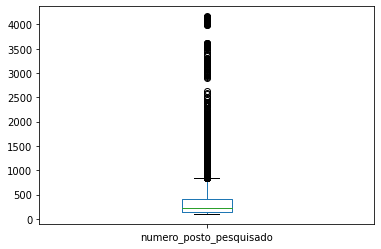

In [39]:
gas_prices_brazil_sf['numero_posto_pesquisado'].plot.box()

# Plot Histogram

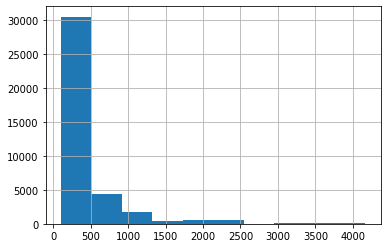

In [40]:
gas_prices_brazil_sf['numero_posto_pesquisado'].hist()

### Generate Log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


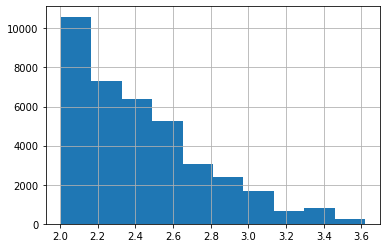

In [41]:
from numpy import log10
gas_prices_brazil_sf['numero_posto_pesquisado_log'] = log10(gas_prices_brazil_sf['numero_posto_pesquisado'])
gas_prices_brazil_sf['numero_posto_pesquisado_log'].hist()

### Calculate Mean Absolute Deviation

In [46]:
mad = gas_prices_brazil_sf['numero_posto_pesquisado_log'].mad()

# Plot hist over median

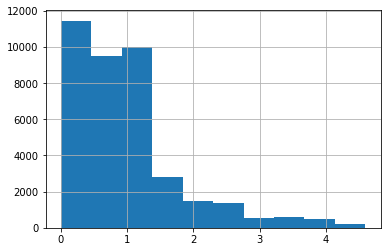

In [47]:
(abs(gas_prices_brazil_sf['numero_posto_pesquisado_log']-gas_prices_brazil_sf['numero_posto_pesquisado_log'].median())/mad).hist()

### Select Interess MAD values

In [52]:
result = gas_prices_brazil_sf[abs(gas_prices_brazil_sf['numero_posto_pesquisado_log']-gas_prices_brazil_sf['numero_posto_pesquisado_log'].median())/mad > 1.2]
result

,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida,numero_posto_pesquisado_log
4,4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.050,1.400,0.24,0.077,0.7441,1.0317,R$/l,2.012837
7,7,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,1.631,0.097,1.116,0.082,2004-05-09,2004-05-15,5,2004,0.158,1.350,2.000,0.515,0.091,0.9923,1.36183,R$/l,2.021189
16,16,NORTE,PARA,ETANOL HIDRATADO,104,1.914,0.129,1.378,0.172,2004-05-09,2004-05-15,5,2004,0.246,1.270,2.400,0.536,0.237,0.7564,1.8908,R$/l,2.017033
21,21,SUDESTE,MINAS GERAIS,ETANOL HIDRATADO,1238,1.205,0.100,0.816,0.151,2004-05-09,2004-05-15,5,2004,0.120,0.920,1.875,0.389,0.123,0.3797,1.437,R$/l,3.092721
22,22,SUDESTE,RIO DE JANEIRO,ETANOL HIDRATADO,952,1.098,0.140,0.786,0.22,2004-05-09,2004-05-15,5,2004,0.154,0.740,1.890,0.312,0.173,0.326,1.263,R$/l,2.978637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106751,106751,SUDESTE,SAO PAULO,ÓLEO DIESEL S10,1277,3.574,0.047,3.123,0.036,2019-06-23,2019-06-29,6,2019,0.169,3.199,4.320,0.451,0.111,2.885,3.491,R$/l,3.106191
106766,106766,SUDESTE,MINAS GERAIS,GASOLINA COMUM,587,4.708,0.034,4.274,0.022,2019-06-23,2019-06-29,6,2019,0.160,4.150,5.219,0.434,0.092,4.1,4.5361,R$/l,2.768638
106778,106778,SUDESTE,SAO PAULO,GASOLINA COMUM,1644,4.142,0.044,3.713,0.026,2019-06-23,2019-06-29,6,2019,0.183,3.769,4.999,0.429,0.097,3.52,4.0892,R$/l,3.215902
106793,106793,SUDESTE,MINAS GERAIS,GLP,508,70.032,0.079,53.761,0.092,2019-06-23,2019-06-29,6,2019,5.518,55.000,95.000,16.271,4.956,45.27,74.1,R$/13Kg,2.705864


In [53]:
len(result)

10382

In [54]:
result = gas_prices_brazil_sf[abs(gas_prices_brazil_sf['numero_posto_pesquisado_log']-gas_prices_brazil_sf['numero_posto_pesquisado_log'].median())/mad < 1.2]
result

,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida,numero_posto_pesquisado_log
0,0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.190,1.350,0.463,0.11,0.4201,0.9666,R$/l,2.103804
2,2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.97,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.180,1.760,0.419,0.095,0.5614,1.161,R$/l,2.283301
3,3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.83,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.090,1.509,0.432,0.119,0.5991,1.22242,R$/l,2.209515
5,5,NORDESTE,BAHIA,ETANOL HIDRATADO,408,1.383,0.095,0.957,0.134,2004-05-09,2004-05-15,5,2004,0.132,0.999,2.050,0.426,0.128,0.5686,1.35,R$/l,2.610660
6,6,NORDESTE,CEARA,ETANOL HIDRATADO,278,1.453,0.150,1.1,0.062,2004-05-09,2004-05-15,5,2004,0.218,1.030,1.950,0.353,0.068,0.7332,1.294,R$/l,2.444045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106796,106796,SUL,PARANA,GLP,402,70.277,0.095,53.486,0.098,2019-06-23,2019-06-29,6,2019,6.645,55.000,90.000,16.791,5.254,45.31,69,R$/13Kg,2.604226
106797,106797,NORDESTE,PERNAMBUCO,GLP,165,66.735,0.055,53.498,0.06,2019-06-23,2019-06-29,6,2019,3.701,54.000,80.000,13.237,3.184,46,60,R$/13Kg,2.217484
106799,106799,SUDESTE,RIO DE JANEIRO,GLP,221,65.010,0.089,47.535,0.083,2019-06-23,2019-06-29,6,2019,5.812,50.000,79.000,17.475,3.934,39,58.2,R$/13Kg,2.344392
106801,106801,SUL,RIO GRANDE DO SUL,GLP,374,69.442,0.078,51.262,0.127,2019-06-23,2019-06-29,6,2019,5.413,58.000,88.000,18.18,6.52,37.028,68,R$/13Kg,2.572872


In [55]:
len(result)

27993

### Remove outlier using Tukey Method

In [57]:
gas_prices_brazil_sf['preco_maximo_revenda'].describe()

count    38375.000000
mean        18.007392
std         23.728817
min          1.099000
25%          2.499000
50%          3.389000
75%         38.500000
max        110.000000
Name: preco_maximo_revenda, dtype: float64

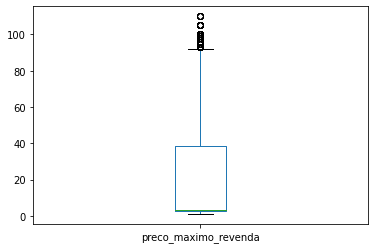

In [58]:
gas_prices_brazil_sf['preco_maximo_revenda'].plot.box()

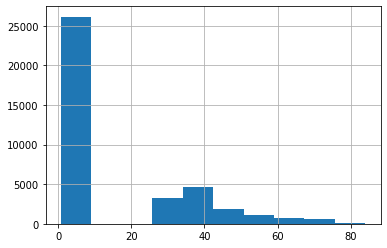

In [61]:
gas_prices_brazil_sf['preco_medio_revenda'].hist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


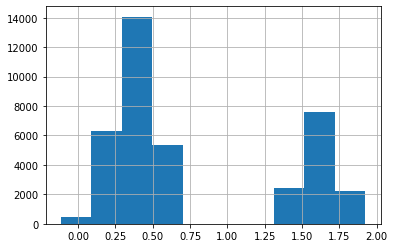

In [63]:
gas_prices_brazil_sf['preco_medio_revenda_log'] = log10(gas_prices_brazil_sf['preco_medio_revenda'])
gas_prices_brazil_sf['preco_medio_revenda_log'].hist()

### Calculate Quartil Interval

In [64]:
q1 = gas_prices_brazil_sf['preco_medio_revenda_log'].quantile(q=0.25)
q3 = gas_prices_brazil_sf['preco_medio_revenda_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

1.1820150904208675


### Select Values below Q1

In [65]:
gas_prices_brazil_sf[gas_prices_brazil_sf['preco_medio_revenda_log'] < (q1-1.5*iqr)]


,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida,numero_posto_pesquisado_log,preco_medio_revenda_log


### Select Values Above Q3

In [66]:
gas_prices_brazil_sf[gas_prices_brazil_sf['preco_medio_revenda_log'] > (q3-1.5*iqr)]


,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida,numero_posto_pesquisado_log,preco_medio_revenda_log
0,0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.190,1.350,0.463,0.11,0.4201,0.9666,R$/l,2.103804,0.109916
2,2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.97,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.180,1.760,0.419,0.095,0.5614,1.161,R$/l,2.283301,0.142702
3,3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.83,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.090,1.509,0.432,0.119,0.5991,1.22242,R$/l,2.209515,0.101059
4,4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.050,1.400,0.24,0.077,0.7441,1.0317,R$/l,2.012837,0.072250
5,5,NORDESTE,BAHIA,ETANOL HIDRATADO,408,1.383,0.095,0.957,0.134,2004-05-09,2004-05-15,5,2004,0.132,0.999,2.050,0.426,0.128,0.5686,1.35,R$/l,2.610660,0.140822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106797,106797,NORDESTE,PERNAMBUCO,GLP,165,66.735,0.055,53.498,0.06,2019-06-23,2019-06-29,6,2019,3.701,54.000,80.000,13.237,3.184,46,60,R$/13Kg,2.217484,1.824354
106799,106799,SUDESTE,RIO DE JANEIRO,GLP,221,65.010,0.089,47.535,0.083,2019-06-23,2019-06-29,6,2019,5.812,50.000,79.000,17.475,3.934,39,58.2,R$/13Kg,2.344392,1.812980
106801,106801,SUL,RIO GRANDE DO SUL,GLP,374,69.442,0.078,51.262,0.127,2019-06-23,2019-06-29,6,2019,5.413,58.000,88.000,18.18,6.52,37.028,68,R$/13Kg,2.572872,1.841622
106805,106805,SUDESTE,SAO PAULO,GLP,1017,66.893,0.091,49.214,0.103,2019-06-23,2019-06-29,6,2019,6.100,50.000,89.900,17.679,5.071,40.19,72,R$/13Kg,3.007321,1.825381


### Select Values between Q1 and Q3

In [ ]:
gas_prices_brazil_sf = gas_prices_brazil_sf[(gas_prices_brazil_sf['preco_medio_revenda_log'] > (q1-1.5*iqr)) & (gas_prices_brazil_sf['preco_medio_revenda_log'] < (q3+1.5*iqr))]


In [70]:
len(gas_prices_brazil_sf)

38375

### Remove outliers using quoncide two variables

In [71]:
gas_prices_brazil_sf.columns

Index(['Unnamed: 0', 'regiao', 'estado', 'produto', 'numero_posto_pesquisado',
       'preco_medio_revenda', 'coef_variacao_revenda',
       'preco_medio_distribuicao', 'coef_variacao_distribuicao',
       'data_inicial', 'data_final', 'mes', 'ano', 'desvio_padrao_revenda',
       'preco_minimo_revenda', 'preco_maximo_revenda', 'margem_media_revenda',
       'desvio_padrao_distribuicao', 'preco_minimo_distribuicao',
       'preco_maximo_distribuicao', 'unidade_de_medida',
       'numero_posto_pesquisado_log', 'preco_medio_revenda_log'],
      dtype='object')

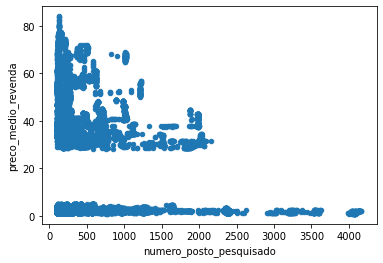

In [73]:
gas_prices_brazil_sf.plot.scatter(x='numero_posto_pesquisado',y='preco_medio_revenda')


In [74]:
gas_prices_brazil_sf['preco_medio_revenda_m2'] = gas_prices_brazil_sf['preco_medio_revenda'] / gas_prices_brazil_sf['numero_posto_pesquisado']

In [75]:
gas_prices_brazil_sf['preco_medio_revenda_m2'].describe()

count    38375.000000
mean         0.070676
std          0.116295
min          0.000188
25%          0.008126
50%          0.017315
75%          0.072593
max          0.694573
Name: preco_medio_revenda_m2, dtype: float64

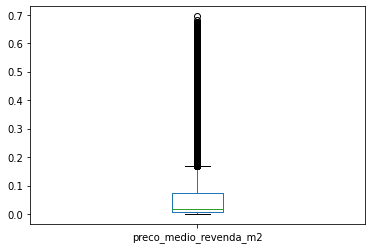

In [78]:
gas_prices_brazil_sf['preco_medio_revenda_m2'].plot.box()

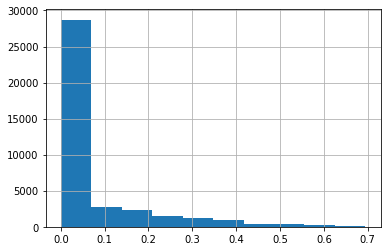

In [79]:
gas_prices_brazil_sf['preco_medio_revenda_m2'].hist()

### Apply log

In [80]:
gas_prices_brazil_sf['preco_medio_revenda_m2'] = log10(gas_prices_brazil_sf['preco_medio_revenda_m2'])

### Calculate MAD

In [81]:
mad = abs(gas_prices_brazil_sf['preco_medio_revenda_m2'] - gas_prices_brazil_sf['preco_medio_revenda_m2'].median()).median()*(1/0.6745)

### Plot Histogram

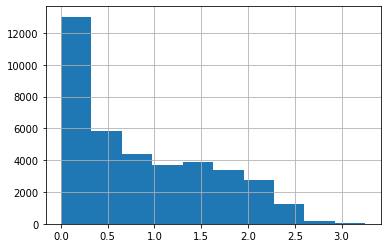

In [82]:
(abs(gas_prices_brazil_sf['preco_medio_revenda_m2']-gas_prices_brazil_sf['preco_medio_revenda_m2'].median())/mad).hist()

### Select Values above 0.3

In [88]:
gas_prices_brazil_sf[abs(gas_prices_brazil_sf['preco_medio_revenda_m2']-gas_prices_brazil_sf['preco_medio_revenda_m2'].median())/mad > 0.3]

,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida,numero_posto_pesquisado_log,preco_medio_revenda_log,preco_medio_revenda_m2
0,0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.190,1.350,0.463,0.11,0.4201,0.9666,R$/l,2.103804,0.109916,-1.993888
2,2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.97,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.180,1.760,0.419,0.095,0.5614,1.161,R$/l,2.283301,0.142702,-2.140599
3,3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.83,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.090,1.509,0.432,0.119,0.5991,1.22242,R$/l,2.209515,0.101059,-2.108456
5,5,NORDESTE,BAHIA,ETANOL HIDRATADO,408,1.383,0.095,0.957,0.134,2004-05-09,2004-05-15,5,2004,0.132,0.999,2.050,0.426,0.128,0.5686,1.35,R$/l,2.610660,0.140822,-2.469838
6,6,NORDESTE,CEARA,ETANOL HIDRATADO,278,1.453,0.150,1.1,0.062,2004-05-09,2004-05-15,5,2004,0.218,1.030,1.950,0.353,0.068,0.7332,1.294,R$/l,2.444045,0.162266,-2.281779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106796,106796,SUL,PARANA,GLP,402,70.277,0.095,53.486,0.098,2019-06-23,2019-06-29,6,2019,6.645,55.000,90.000,16.791,5.254,45.31,69,R$/13Kg,2.604226,1.846813,-0.757413
106797,106797,NORDESTE,PERNAMBUCO,GLP,165,66.735,0.055,53.498,0.06,2019-06-23,2019-06-29,6,2019,3.701,54.000,80.000,13.237,3.184,46,60,R$/13Kg,2.217484,1.824354,-0.393130
106799,106799,SUDESTE,RIO DE JANEIRO,GLP,221,65.010,0.089,47.535,0.083,2019-06-23,2019-06-29,6,2019,5.812,50.000,79.000,17.475,3.934,39,58.2,R$/13Kg,2.344392,1.812980,-0.531412
106801,106801,SUL,RIO GRANDE DO SUL,GLP,374,69.442,0.078,51.262,0.127,2019-06-23,2019-06-29,6,2019,5.413,58.000,88.000,18.18,6.52,37.028,68,R$/13Kg,2.572872,1.841622,-0.731249


### Select values below 0.3

In [89]:
gas_prices_brazil_sf[abs(gas_prices_brazil_sf['preco_medio_revenda_m2']-gas_prices_brazil_sf['preco_medio_revenda_m2'].median())/mad < 0.3]

,Unnamed: 0,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,unidade_de_medida,numero_posto_pesquisado_log,preco_medio_revenda_log,preco_medio_revenda_m2
4,4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.050,1.400,0.24,0.077,0.7441,1.0317,R$/l,2.012837,0.072250,-1.940587
7,7,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,1.631,0.097,1.116,0.082,2004-05-09,2004-05-15,5,2004,0.158,1.350,2.000,0.515,0.091,0.9923,1.36183,R$/l,2.021189,0.212454,-1.808735
16,16,NORTE,PARA,ETANOL HIDRATADO,104,1.914,0.129,1.378,0.172,2004-05-09,2004-05-15,5,2004,0.246,1.270,2.400,0.536,0.237,0.7564,1.8908,R$/l,2.017033,0.281942,-1.735091
34,34,NORDESTE,MARANHAO,ETANOL HIDRATADO,108,1.617,0.101,1.088,0.095,2004-05-16,2004-05-22,5,2004,0.164,1.340,2.000,0.529,0.103,0.9224,1.3683,R$/l,2.033424,0.208710,-1.824714
43,43,NORTE,PARA,ETANOL HIDRATADO,117,1.889,0.130,1.318,0.172,2004-05-16,2004-05-22,5,2004,0.246,1.270,2.400,0.571,0.227,0.6099,1.8908,R$/l,2.068186,0.276232,-1.791954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106769,106769,SUL,PARANA,GASOLINA COMUM,367,4.221,0.044,3.839,0.025,2019-06-23,2019-06-29,6,2019,0.186,3.899,4.899,0.382,0.097,3.62,4.0883,R$/l,2.564666,0.625415,-1.939251
106770,106770,NORDESTE,PERNAMBUCO,GASOLINA COMUM,192,4.445,0.042,3.945,0.018,2019-06-23,2019-06-29,6,2019,0.187,4.190,4.999,0.5,0.072,3.82,4.1392,R$/l,2.283301,0.647872,-1.635429
106774,106774,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,361,4.552,0.045,4.109,0.029,2019-06-23,2019-06-29,6,2019,0.206,4.190,5.199,0.443,0.118,3.9152,4.3999,R$/l,2.557507,0.658202,-1.899305
106777,106777,SUL,SANTA CATARINA,GASOLINA COMUM,252,4.087,0.042,3.784,0.022,2019-06-23,2019-06-29,6,2019,0.173,3.770,4.698,0.303,0.083,3.59,3.998,R$/l,2.401401,0.611405,-1.789996


# Estatistica Bivariada

In [ ]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

### Covariancia

In [ ]:
interess_columns = ['numero_posto_pesquisado',	'preco_medio_revenda',	'coef_variacao_revenda', 'preco_medio_distribuicao', 'coef_variacao_distribuicao']

#### ETANOL HIDRATADO

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ETANOL HIDRATADO'][interess_columns].cov()


#### GASOLINA COMUM

In [ ]:

gas_prices_brazil_df[gas_prices_brazil_df.produto=='GASOLINA COMUM'][interess_columns].cov()


#### GLP

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GLP'][interess_columns].cov()


#### GNV

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GNV'][interess_columns].cov()


#### ÓLEO DIESEL

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL'][interess_columns].cov()


#### ÓLEO DIESEL S10

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL S10'][interess_columns].cov()


## Pearson Correlation

#### ETANOL HIDRATADO

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ETANOL HIDRATADO'][interess_columns].corr(method='pearson')


#### GASOLINA COMUM

In [ ]:

gas_prices_brazil_df[gas_prices_brazil_df.produto=='GASOLINA COMUM'][interess_columns].corr(method='pearson')


#### GLP

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GLP'][interess_columns].corr(method='pearson')


#### GNV

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GNV'][interess_columns].corr(method='pearson')


#### ÓLEO DIESEL

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL'][interess_columns].corr(method='pearson')


#### ÓLEO DIESEL S10

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL S10'][interess_columns].corr(method='pearson')


## Spearman Correlation

#### ETANOL HIDRATADO

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ETANOL HIDRATADO'][interess_columns].corr(method='spearman')


#### GASOLINA COMUM

In [ ]:

gas_prices_brazil_df[gas_prices_brazil_df.produto=='GASOLINA COMUM'][interess_columns].corr(method='spearman')


#### GLP

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GLP'][interess_columns].corr(method='spearman')


#### GNV

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='GNV'][interess_columns].corr(method='spearman')


#### ÓLEO DIESEL

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL'][interess_columns].corr(method='spearman')


#### ÓLEO DIESEL S10

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df.produto=='ÓLEO DIESEL S10'][interess_columns].corr(method='spearman')


## Scatter Plot

In [ ]:
interess_columns

['numero_posto_pesquisado',
 'preco_medio_revenda',
 'coef_variacao_revenda',
 'preco_medio_distribuicao',
 'coef_variacao_distribuicao']

#### numero_posto_pesquisado vs preco_medio_revenda

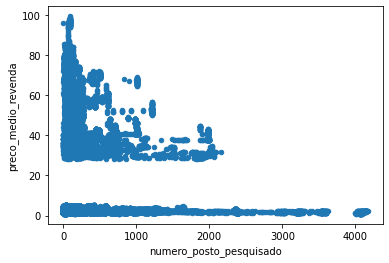

In [ ]:
gas_prices_brazil_df.plot.scatter(x='numero_posto_pesquisado',y='preco_medio_revenda')


#### numero_posto_pesquisado vs coef_variacao_revenda

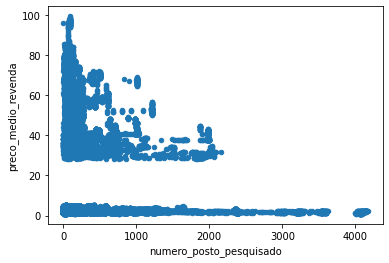

In [ ]:
gas_prices_brazil_df.plot.scatter(x='numero_posto_pesquisado',y='coef_variacao_revenda')


#### numero_posto_pesquisado vs preco_medio_distribuicao

In [ ]:
gas_prices_brazil_df.plot.scatter(x='numero_posto_pesquisado',y='preco_medio_distribuicao')


#### numero_posto_pesquisado vs coef_variacao_distribuicao

In [ ]:
gas_prices_brazil_df.plot.scatter(x='numero_posto_pesquisado',y='coef_variacao_distribuicao')


#### coef_variacao_revenda vs preco_medio_revenda

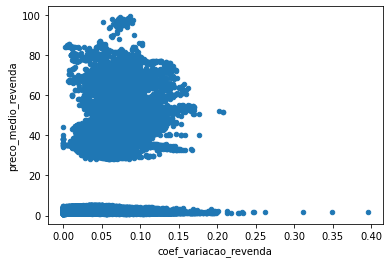

In [ ]:
gas_prices_brazil_df.plot.scatter(x='coef_variacao_revenda',y='preco_medio_revenda')


#### coef_variacao_distribuicao vs preco_medio_distribuicao

In [ ]:
gas_prices_brazil_df.plot.scatter(x='coef_variacao_distribuicao',y='preco_medio_distribuicao')


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7faf2af55830> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7faf2af5a320> (for post_execute):


KeyboardInterrupt: ignored

# Estatística Descritiva

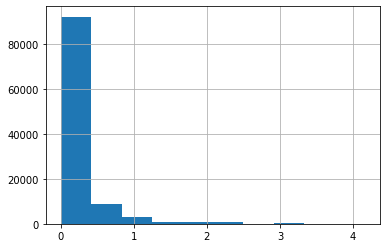

In [ ]:
(gas_prices_brazil_df['numero_posto_pesquisado']/1000).hist()

### Apply log function

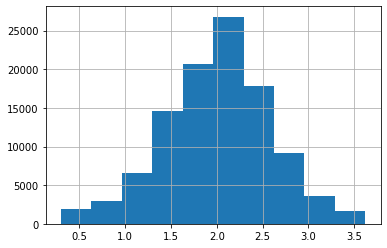

In [ ]:
gas_prices_brazil_df['numero_posto_pesquisado_log'] = gas_prices_brazil_df['numero_posto_pesquisado'].apply(np.log10)
gas_prices_brazil_df[gas_prices_brazil_df['numero_posto_pesquisado_log'] > 0]['numero_posto_pesquisado_log'].hist()


## Estatísticas univariadas¶


### numero_posto_pesquisado

In [ ]:
gas_prices_brazil_df['numero_posto_pesquisado'].mean()

233.77097628787809

In [ ]:
gas_prices_brazil_df['numero_posto_pesquisado'].max()

4167

In [ ]:
gas_prices_brazil_df['numero_posto_pesquisado'].min()

1

In [ ]:
gas_prices_brazil_df['numero_posto_pesquisado'].var()

162636.78979924344

In [ ]:
gas_prices_brazil_df['numero_posto_pesquisado'].std()

403.2825185886979

In [ ]:
gas_prices_brazil_df['numero_posto_pesquisado'].describe()

count    106823.000000
mean        233.770976
std         403.282519
min           1.000000
25%          42.000000
50%         104.000000
75%         243.000000
max        4167.000000
Name: numero_posto_pesquisado, dtype: float64

In [ ]:
gas_prices_brazil_df['numero_posto_pesquisado'].describe()[6] -gas_prices_brazil_df['numero_posto_pesquisado'].describe()[4]

201.0

### Check the Outliers

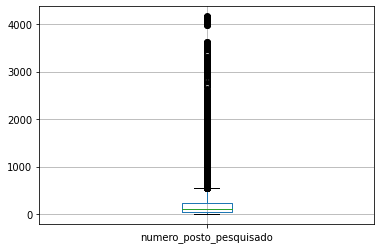

In [ ]:
gas_prices_brazil_df.boxplot(column=['numero_posto_pesquisado'])


### Operation

In [ ]:
#gas_prices_brazil_df['numero_posto_pesquisado'] = gas_prices_brazil_df['numero_posto_pesquisado']/lengas_prices_brazil_df['area']


In [ ]:
gas_prices_brazil_df['produto']

0         ETANOL HIDRATADO
1         ETANOL HIDRATADO
2         ETANOL HIDRATADO
3         ETANOL HIDRATADO
4         ETANOL HIDRATADO
                ...       
106818                 GNV
106819                 GNV
106820                 GNV
106821                 GNV
106822                 GNV
Name: produto, Length: 106823, dtype: object

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['produto'] == 'GNV') & (gas_prices_brazil_df.numero_posto_pesquisado >1) & (gas_prices_brazil_df['estado'] == 'PERNAMBUCO')].mean()

Unnamed: 0                     57714.217834
numero_posto_pesquisado           26.430573
preco_medio_revenda                1.818466
coef_variacao_revenda              0.024799
mes                                6.500637
ano                             2011.433121
desvio_padrao_revenda              0.050390
preco_minimo_revenda               1.786773
preco_maximo_revenda               1.998554
numero_posto_pesquisado_log        1.375927
dtype: float64

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['produto'] == 'ETANOL HIDRATADO') & (gas_prices_brazil_df.numero_posto_pesquisado >1) & (gas_prices_brazil_df['estado'] == 'PERNAMBUCO')].mean()

Unnamed: 0                     38333.623724
numero_posto_pesquisado          292.997449
preco_medio_revenda                2.207764
coef_variacao_revenda              0.066270
mes                                6.502551
ano                             2011.424745
desvio_padrao_revenda              0.138393
preco_minimo_revenda               1.965864
preco_maximo_revenda               2.653765
numero_posto_pesquisado_log        2.437234
dtype: float64

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['estado'])['numero_posto_pesquisado'].mean()


estado
ACRE                     1.000000
ALAGOAS                  8.940568
AMAPA                    1.000000
AMAZONAS                 1.296117
BAHIA                   25.737580
CEARA                   15.485350
DISTRITO FEDERAL         1.000000
ESPIRITO SANTO          10.385696
GOIAS                    1.150538
MARANHAO                 1.090909
MATO GROSSO              2.021429
MATO GROSSO DO SUL       3.947917
MINAS GERAIS            21.426564
PARA                     1.052632
PARAIBA                 14.059873
PARANA                   7.741268
PERNAMBUCO              26.430573
PIAUI                    1.000000
RIO DE JANEIRO         171.312102
RIO GRANDE DO NORTE     18.584713
RIO GRANDE DO SUL       20.985987
RONDONIA                 2.000000
SANTA CATARINA          28.228025
SAO PAULO               95.793631
SERGIPE                  9.540921
TOCANTINS                1.000000
Name: numero_posto_pesquisado, dtype: float64

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['estado']).agg(['mean','median', 'var','std'])


Unnamed: 0           ... numero_posto_pesquisado_log          
                             mean   median  ...                         var       std
estado                                      ...                                      
ACRE                 40882.200000  40854.0  ...                    0.000000  0.000000
ALAGOAS              57270.326873  42536.0  ...                    0.076859  0.277235
AMAPA                70406.916667  85340.0  ...                    0.000000  0.000000
AMAZONAS             57613.495146  42845.5  ...                    0.022601  0.150336
BAHIA                57708.935032  42628.0  ...                    0.020024  0.141507
CEARA                57709.935032  42629.0  ...                    0.061103  0.247189
DISTRITO FEDERAL     68937.333333  41145.0  ...                    0.000000  0.000000
ESPIRITO SANTO       57757.256705  42651.0  ...                    0.040306  0.200762
GOIAS                65745.655914  67100.5  ...                    0.011651  0.107938
MARANHAO             63373.227273  41278.0  ...                    0.007846  0.088577
MATO GROSSO          58266.701786  43350.0  ...                    0.046164  0.214857
MATO GROSSO DO SUL   57264.359375  42518.5  ...                    0.068677  0.262064
MINAS GERAIS         57653.545338  42619.0  ...                    0.167494  0.409261
PARA                 44781.105263  41325.0  ...                    0.004769  0.069061
PARAIBA              57712.789809  42630.0  ...                    0.064777  0.254513
PARANA               57862.767141  42704.0  ...                    0.082712  0.287597
PERNAMBUCO           57714.217834  42631.0  ...                    0.052139  0.228339
PIAUI                41429.777778  36935.0  ...                    0.000000  0.000000
RIO DE JANEIRO       57717.917197  42636.0  ...                    0.022982  0.151597
RIO GRANDE DO NORTE  57715.740127  42632.0  ...                    0.029216  0.170926
RIO GRANDE DO SUL    57720.473885  42639.0  ...                    0.031866  0.178509
RONDONIA             39516.333333  40634.0  ...                    0.058212  0.241272
SANTA CATARINA       57721.473885  42640.0  ...                    0.037359  0.193285
SAO PAULO            57720.208917  42637.0  ...                    0.043634  0.208889
SERGIPE              57567.492327  42608.5  ...                    0.058901  0.242696
TOCANTINS            79059.333333  91918.5  ...                    0.000000  0.000000

[26 rows x 40 columns]

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['estado']).agg(['mean','median', 'var','std'])


Unnamed: 0           ... numero_posto_pesquisado_log          
                             mean   median  ...                         var       std
estado                                      ...                                      
ACRE                 38369.940051  10578.5  ...                    0.035067  0.187261
ALAGOAS              38400.793631  10583.0  ...                    0.027732  0.166529
AMAPA                32108.869132   9513.0  ...                    0.170495  0.412910
AMAZONAS             38407.814013  10594.0  ...                    0.029074  0.170511
BAHIA                38402.551592  10584.0  ...                    0.012251  0.110683
CEARA                38403.551592  10585.0  ...                    0.007840  0.088546
DISTRITO FEDERAL     38400.565605  10579.0  ...                    0.051626  0.227213
ESPIRITO SANTO       38412.378344  10599.0  ...                    0.062924  0.250846
GOIAS                38401.996178  10580.0  ...                    0.016941  0.130159
MARANHAO             38405.843312  10586.0  ...                    0.043748  0.209161
MATO GROSSO          38403.426752  10581.0  ...                    0.008675  0.093141
MATO GROSSO DO SUL   38404.426752  10582.0  ...                    0.019082  0.138139
MINAS GERAIS         38415.100637  10600.0  ...                    0.030698  0.175208
PARA                 38412.689172  10595.0  ...                    0.044630  0.211259
PARAIBA              38408.565605  10587.0  ...                    0.033893  0.184100
PARANA               38418.100637  10603.0  ...                    0.024698  0.157157
PERNAMBUCO           38333.623724  10574.5  ...                    0.030572  0.174849
PIAUI                38410.994904  10589.0  ...                    0.027132  0.164718
RIO DE JANEIRO       38418.252229  10601.0  ...                    0.028079  0.167567
RIO GRANDE DO NORTE  38412.425478  10590.0  ...                    0.027525  0.165907
RIO GRANDE DO SUL    38420.821656  10604.0  ...                    0.057459  0.239706
RONDONIA             38416.701911  10596.0  ...                    0.053151  0.230545
RORAIMA              38391.661954  10610.5  ...                    0.124420  0.352732
SANTA CATARINA       38346.316327  10591.5  ...                    0.036792  0.191813
SAO PAULO            38421.400000  10602.0  ...                    0.023926  0.154679
SERGIPE              38415.573248  10591.0  ...                    0.025447  0.159520
TOCANTINS            38343.614796  10584.5  ...                    0.015380  0.124018

[27 rows x 40 columns]

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['regiao']).agg(['mean','median', 'var','std'])


Unnamed: 0                         ... numero_posto_pesquisado_log                    
                      mean   median           var  ...                      median       var       std
regiao                                             ...                                                
CENTRO OESTE  58737.694682  43514.0  4.400414e+08  ...                    0.301030  0.083973  0.289781
NORDESTE      57442.697220  42534.0  5.186561e+08  ...                    1.176091  0.106474  0.326303
NORTE         57395.623632  42551.0  4.877093e+08  ...                    0.000000  0.021510  0.146664
SUDESTE       57712.240753  42635.5  5.199503e+08  ...                    1.672098  0.331143  0.575450
SUL           57767.754161  42657.0  5.201227e+08  ...                    1.230449  0.118338  0.344002

[5 rows x 40 columns]

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['regiao']).agg(['mean','median', 'var','std'])


Unnamed: 0                         ... numero_posto_pesquisado_log                    
                      mean   median           var  ...                      median       var       std
regiao                                             ...                                                
CENTRO OESTE  38402.603822  10580.5  1.488575e+09  ...                    2.146128  0.064230  0.253437
NORDESTE      38399.334088  10586.5  1.487905e+09  ...                    2.037426  0.111724  0.334252
NORTE         37573.257032  10434.5  1.461730e+09  ...                    1.591065  0.227600  0.477074
SUDESTE       38416.782803  10600.5  1.488078e+09  ...                    2.862728  0.221824  0.470982
SUL           38395.100255  10603.5  1.487366e+09  ...                    2.699404  0.047238  0.217343

[5 rows x 40 columns]

## Produto Group by Estado

### Agg media


In [ ]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

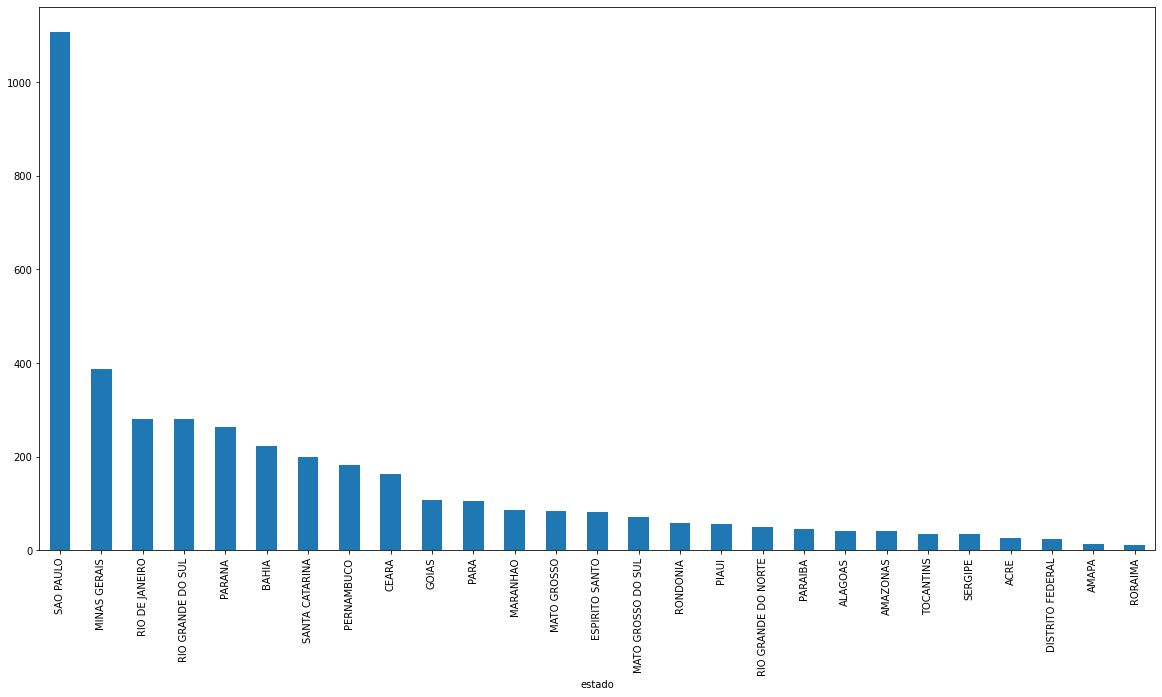

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL S10'].groupby(['estado'])['numero_posto_pesquisado'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

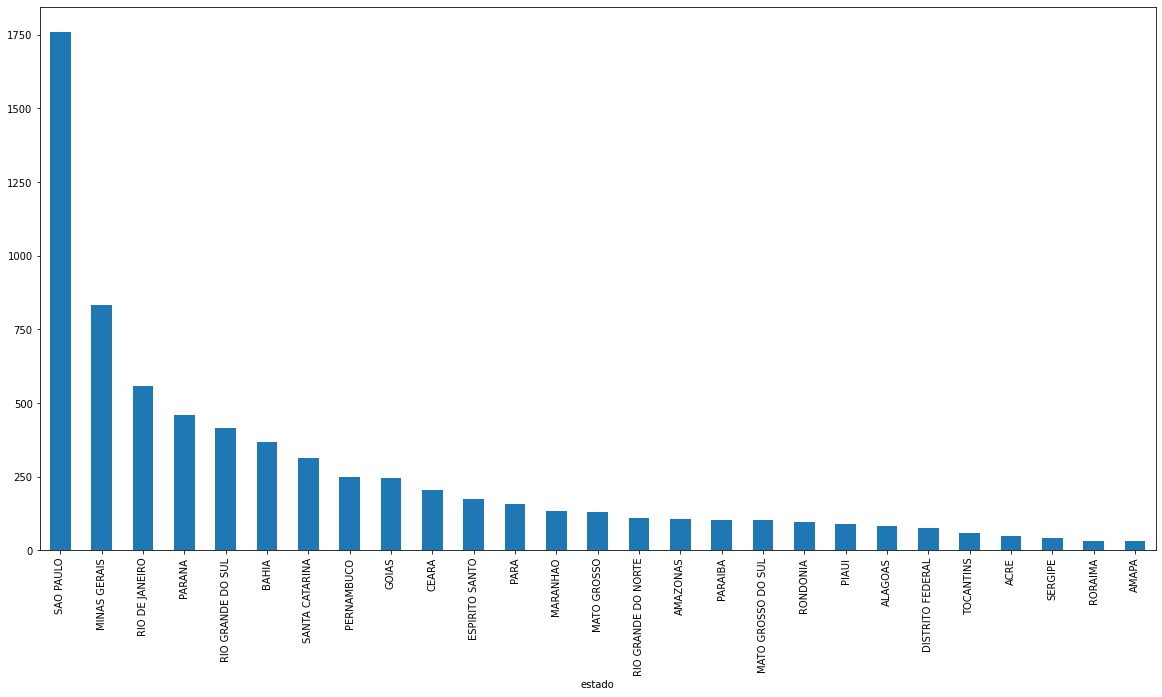

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL'].groupby(['estado'])['numero_posto_pesquisado'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

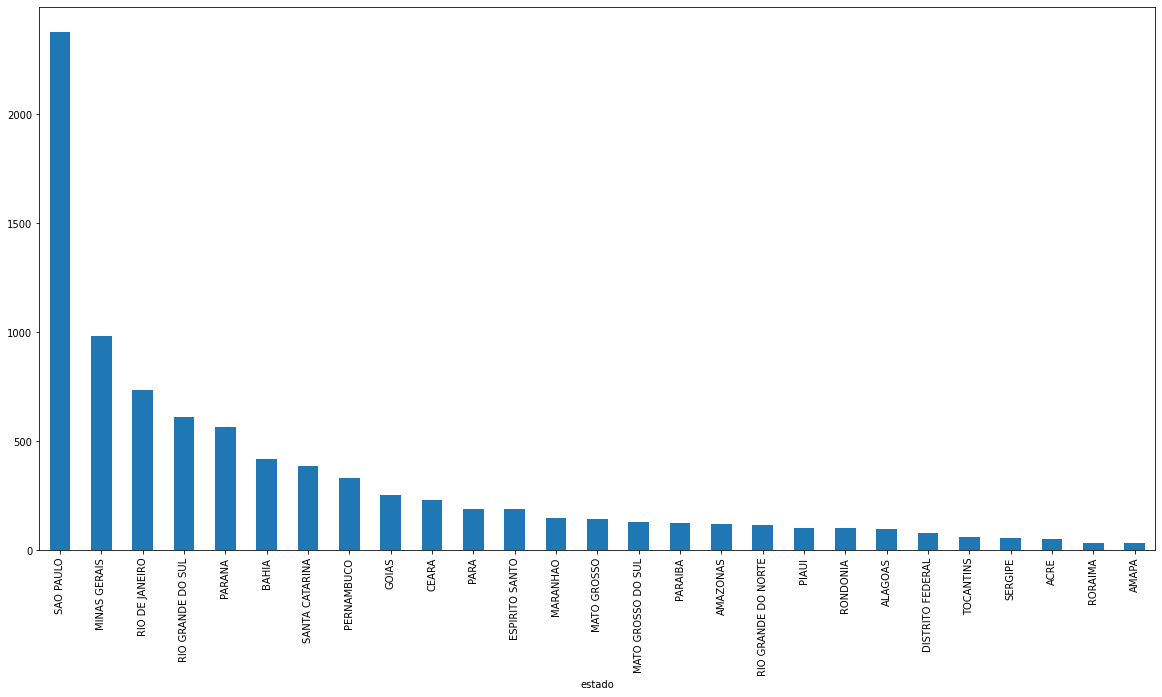

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['estado'])['numero_posto_pesquisado'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

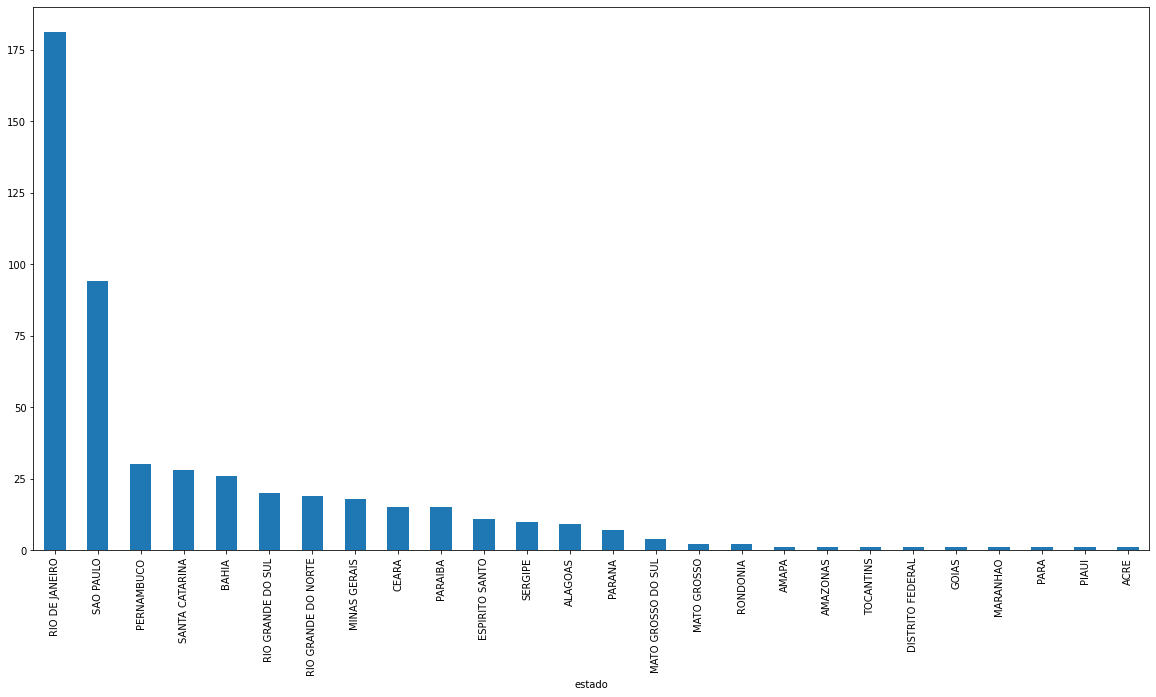

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['estado'])['numero_posto_pesquisado'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

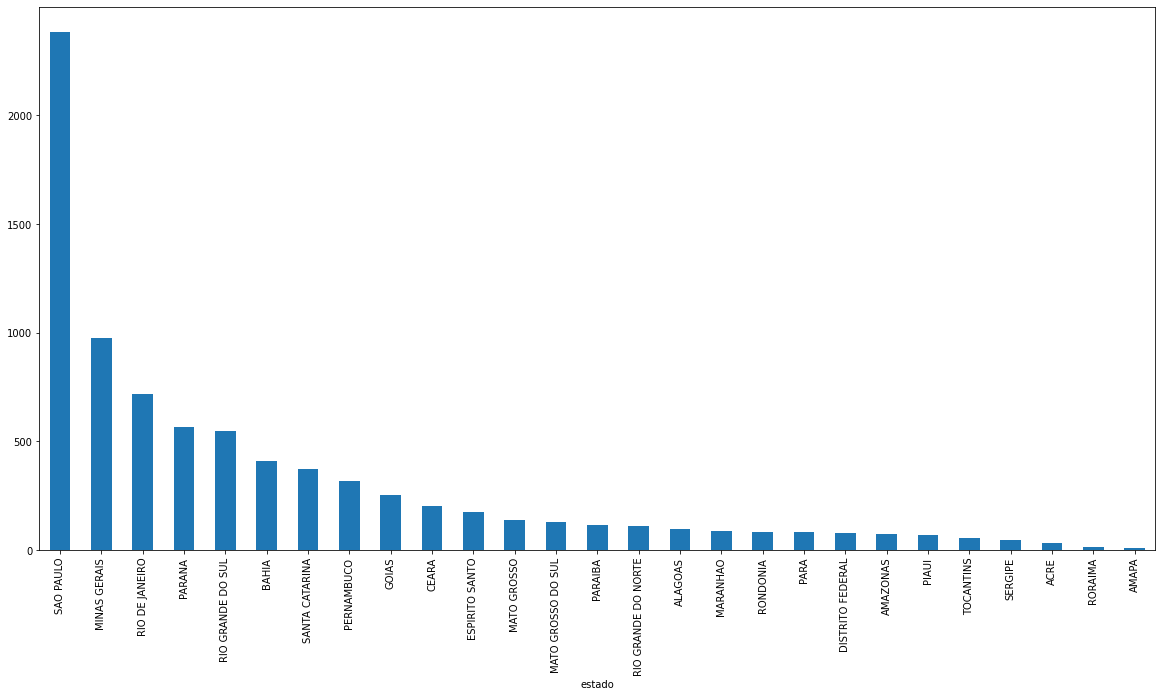

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['estado'])['numero_posto_pesquisado'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Agg var


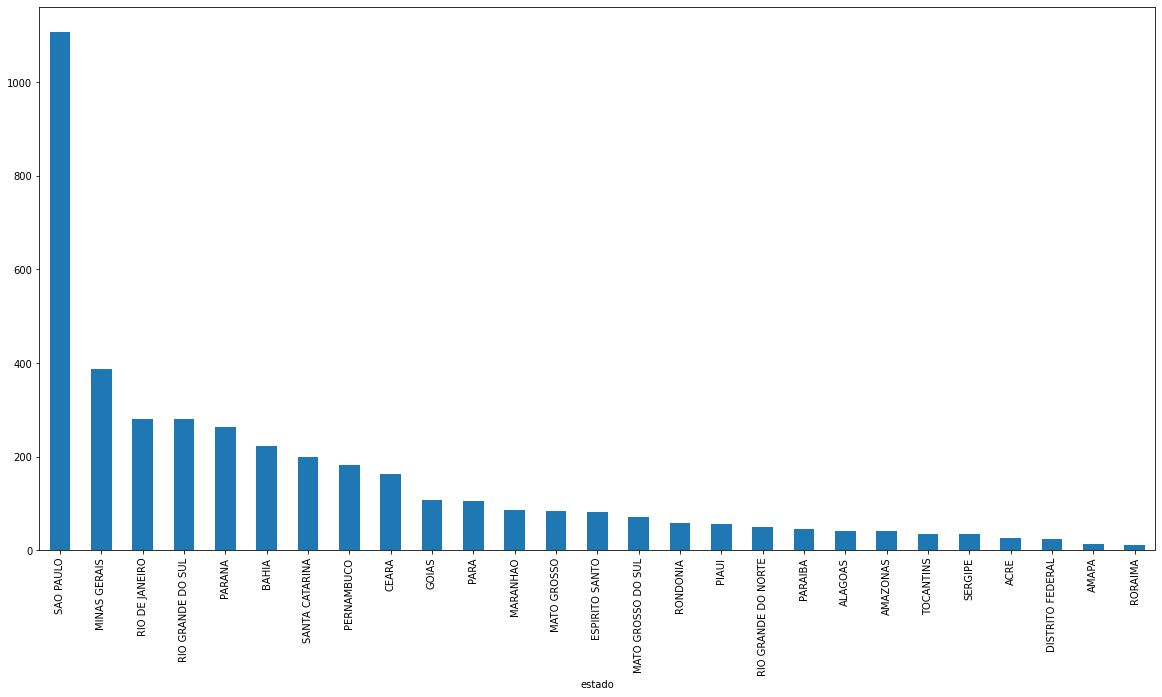

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL S10'].groupby(['estado'])['numero_posto_pesquisado'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

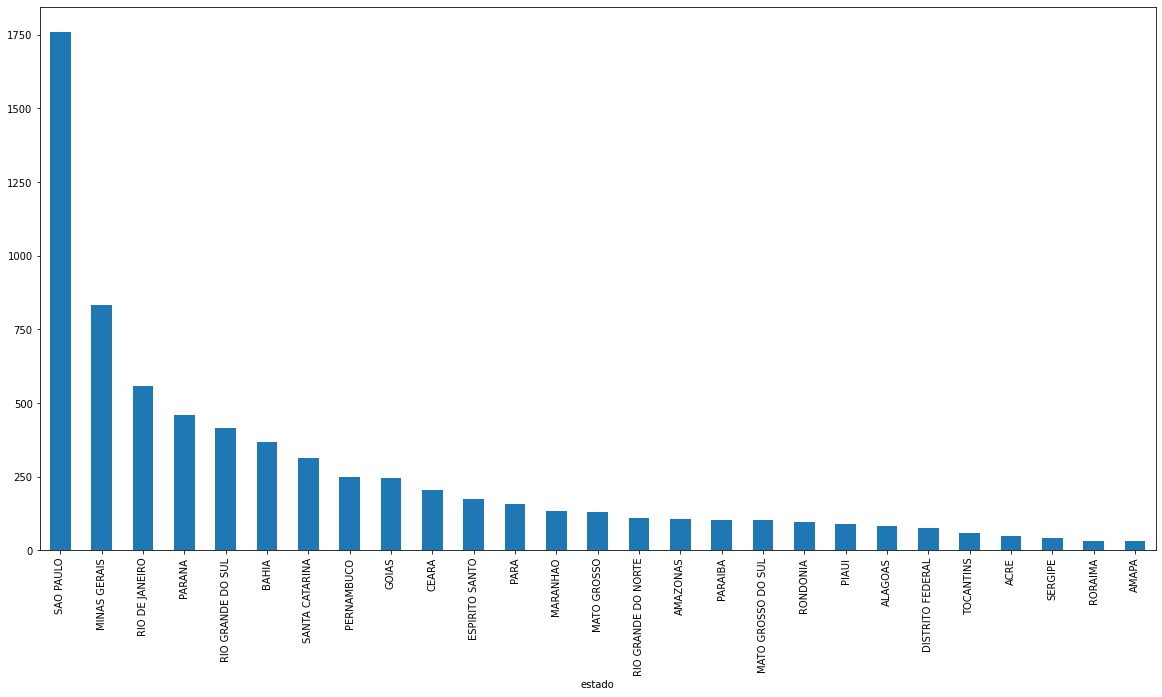

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL'].groupby(['estado'])['numero_posto_pesquisado'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

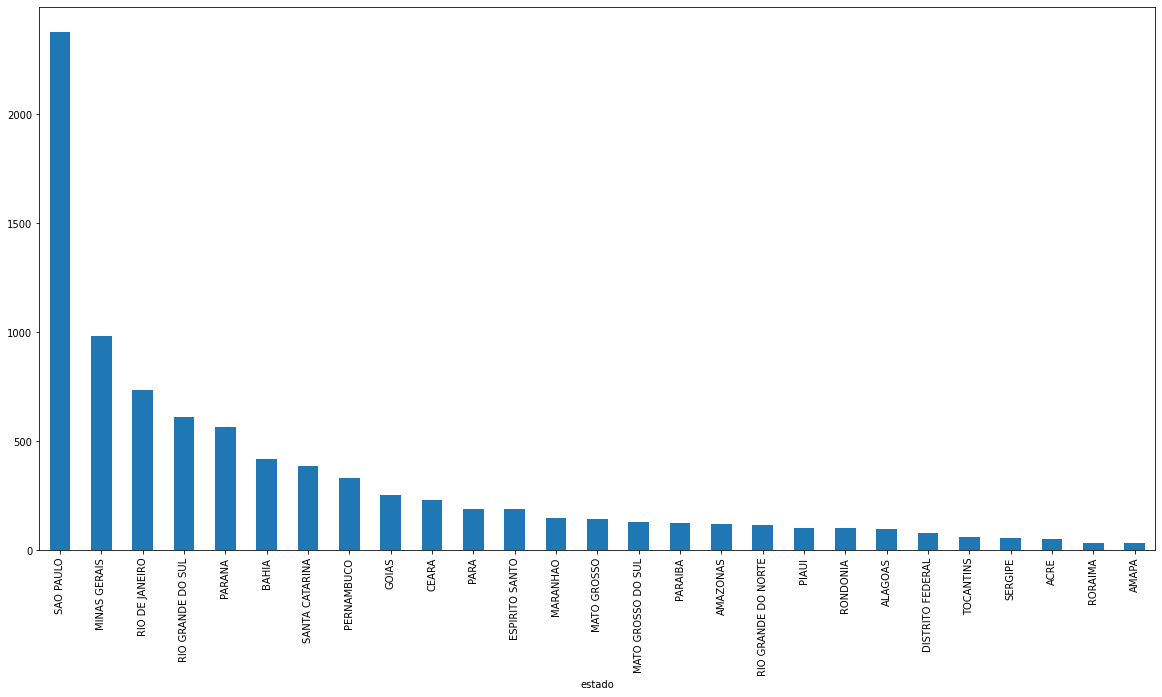

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['estado'])['numero_posto_pesquisado'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

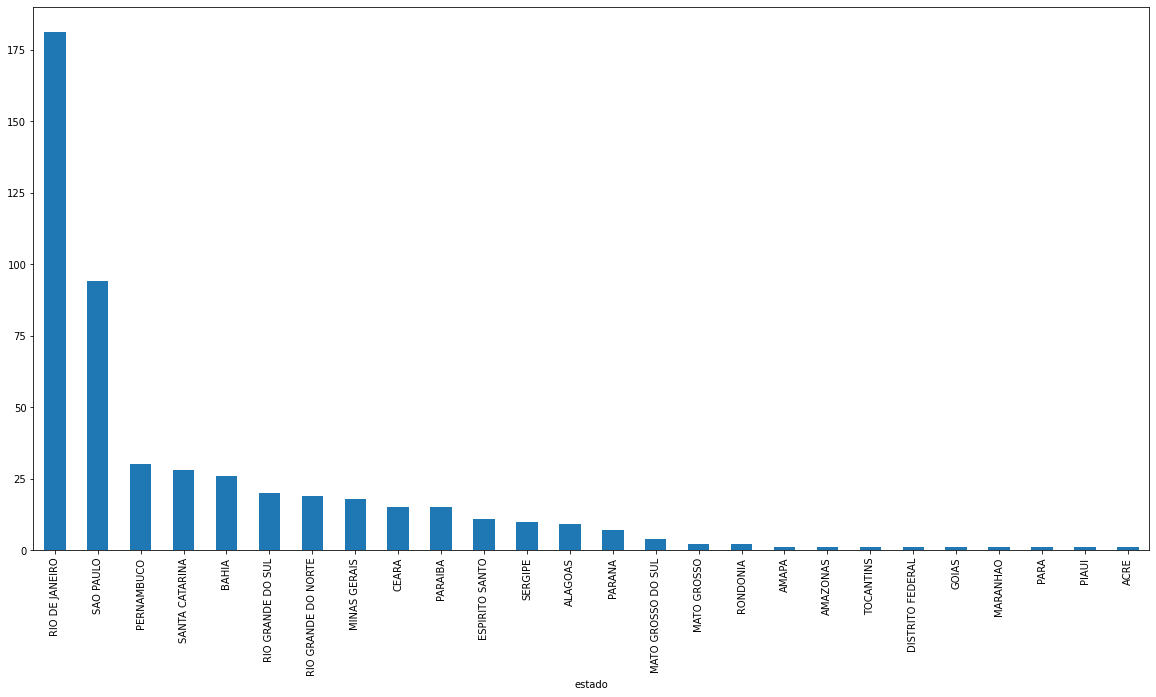

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['estado'])['numero_posto_pesquisado'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

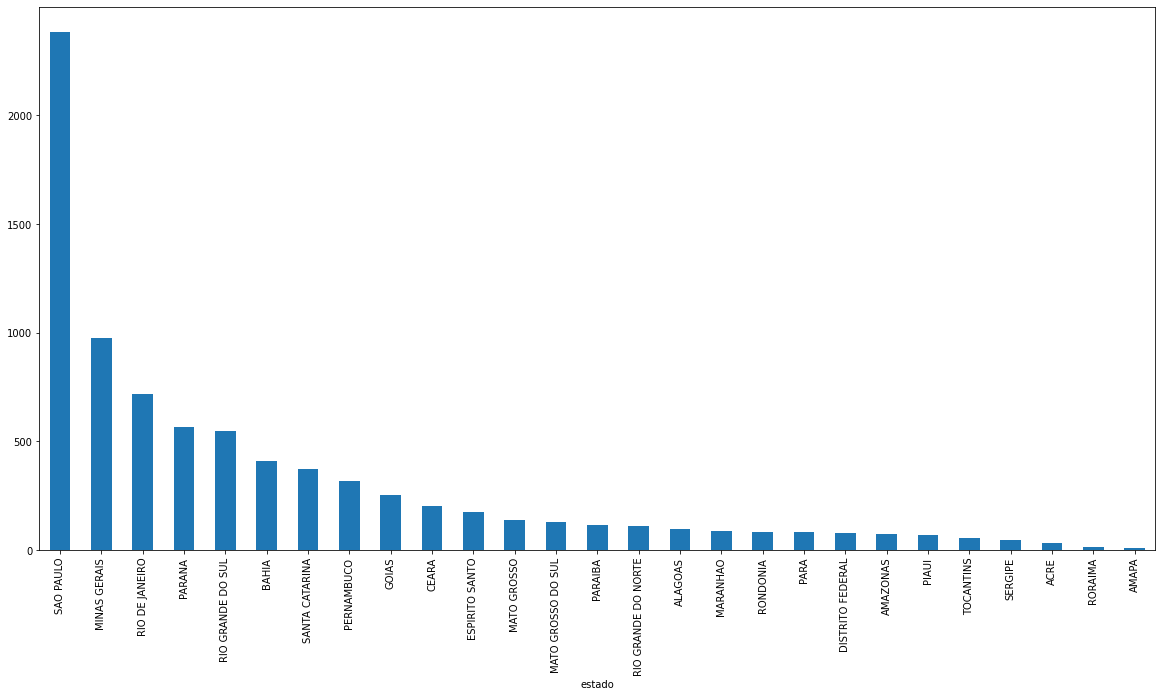

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['estado'])['numero_posto_pesquisado'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Agg std


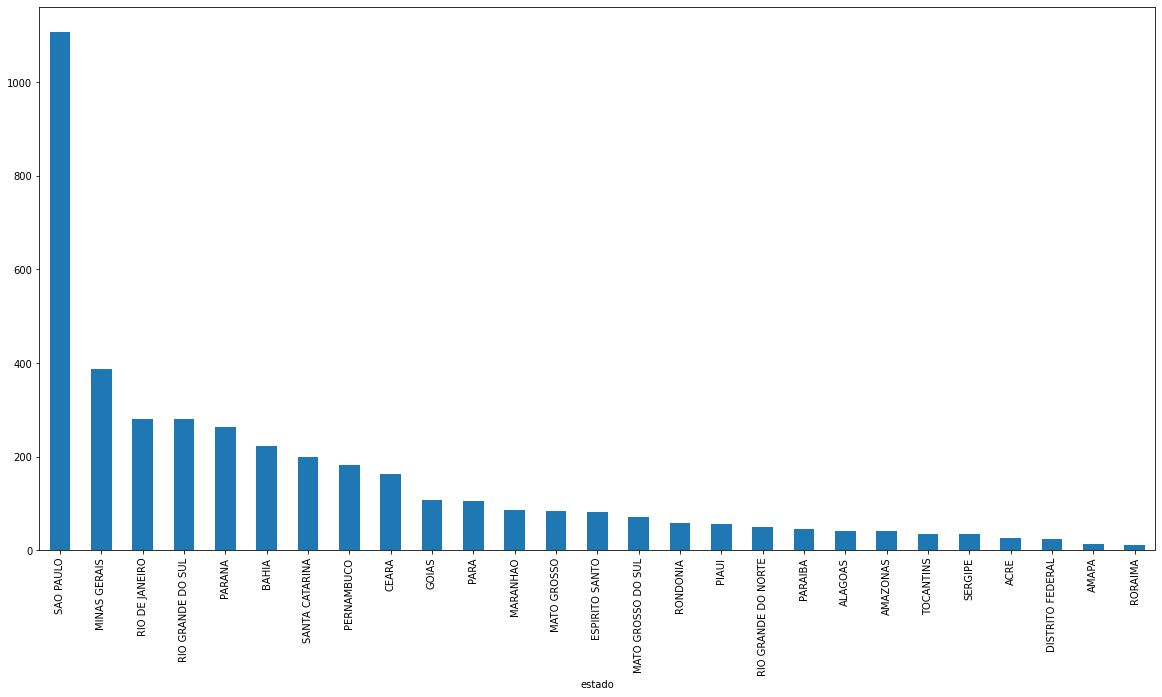

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL S10'].groupby(['estado'])['numero_posto_pesquisado'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

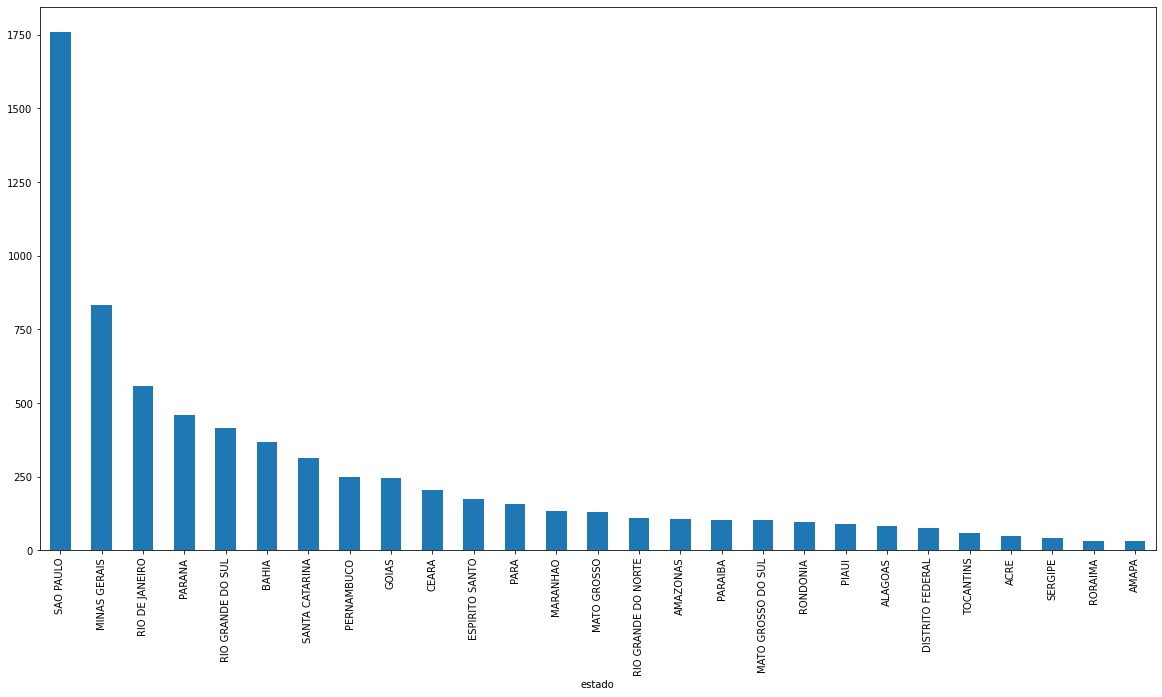

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto'] =='ÓLEO DIESEL'].groupby(['estado'])['numero_posto_pesquisado'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

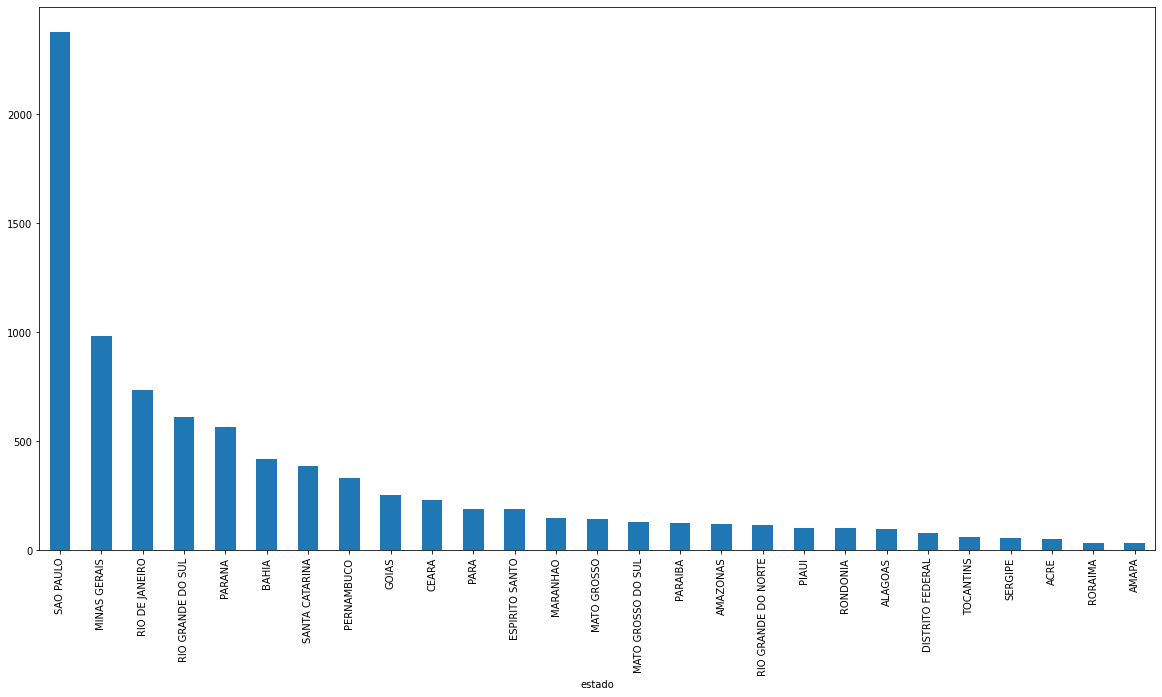

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['estado'])['numero_posto_pesquisado'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

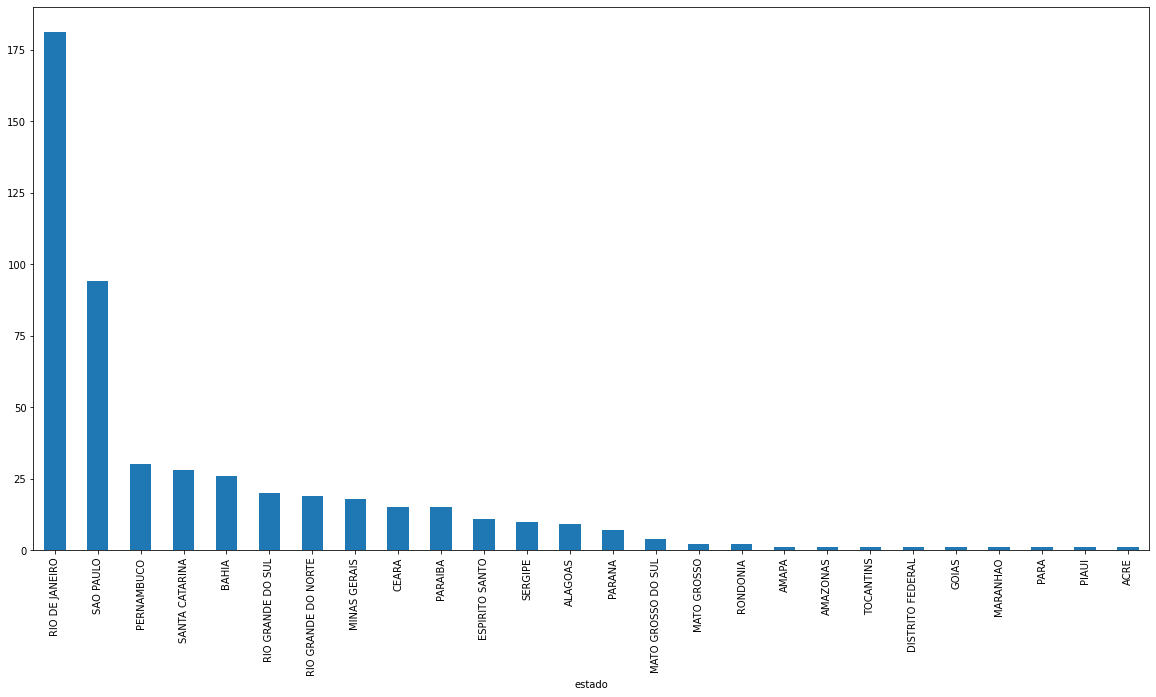

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['estado'])['numero_posto_pesquisado'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

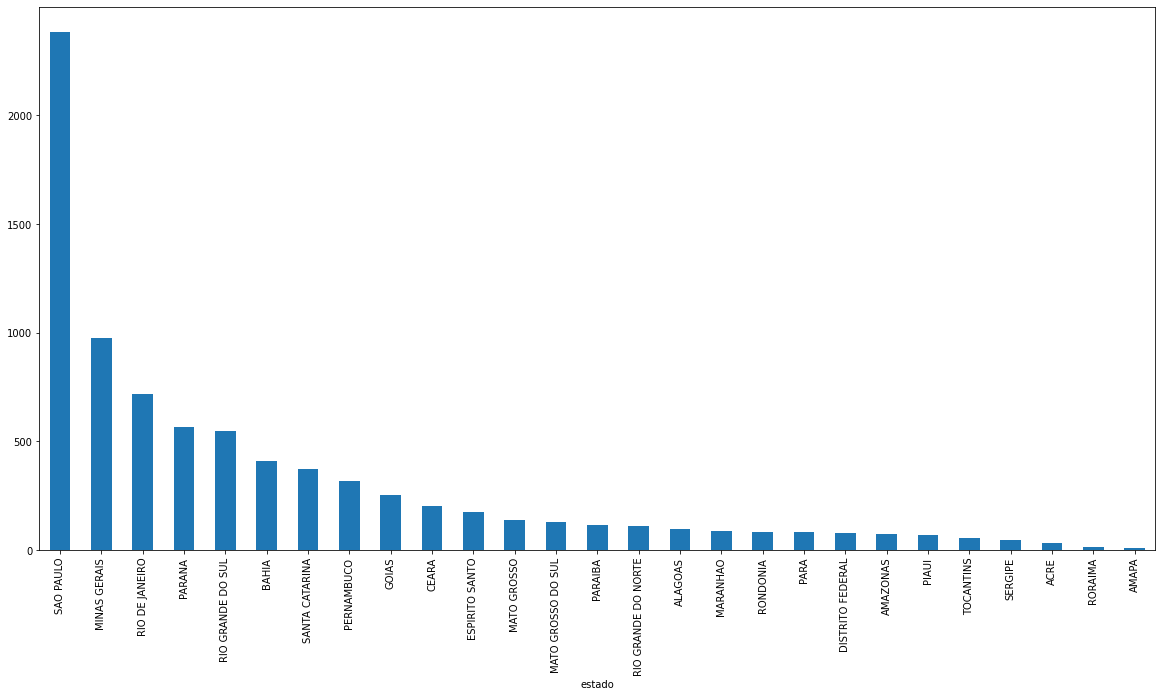

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['estado'])['numero_posto_pesquisado'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

## Produto group by Regiao

### Agg Median

In [ ]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

#### Etanol Hidratado

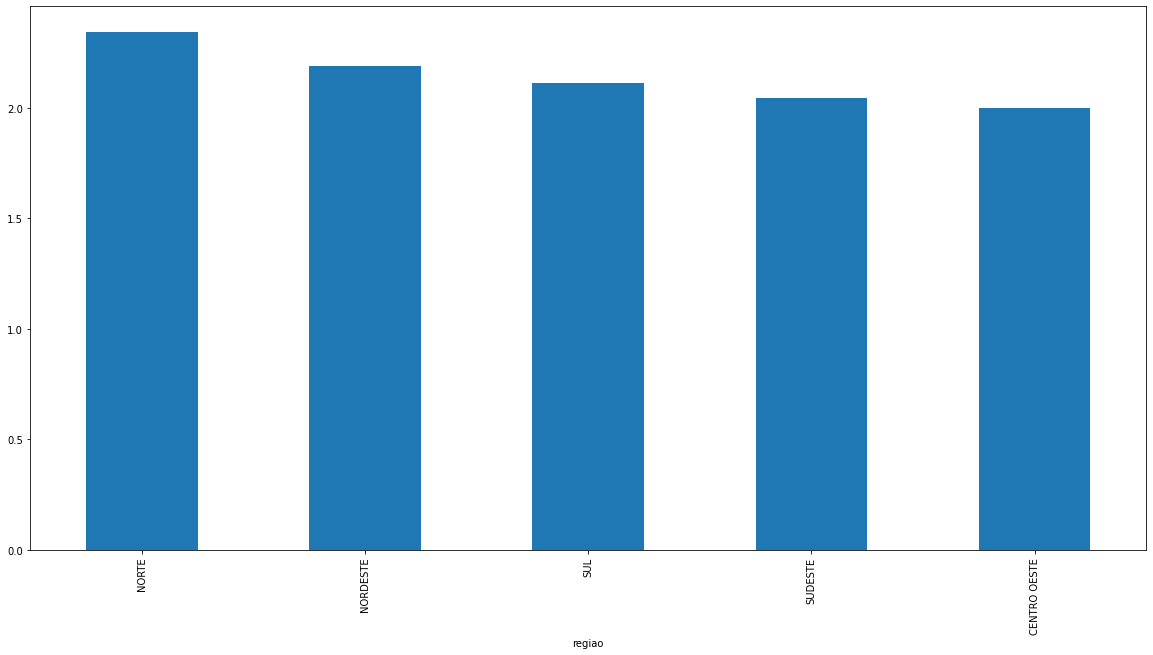

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['regiao'])['preco_medio_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [ ]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

#### Gasolina Comum

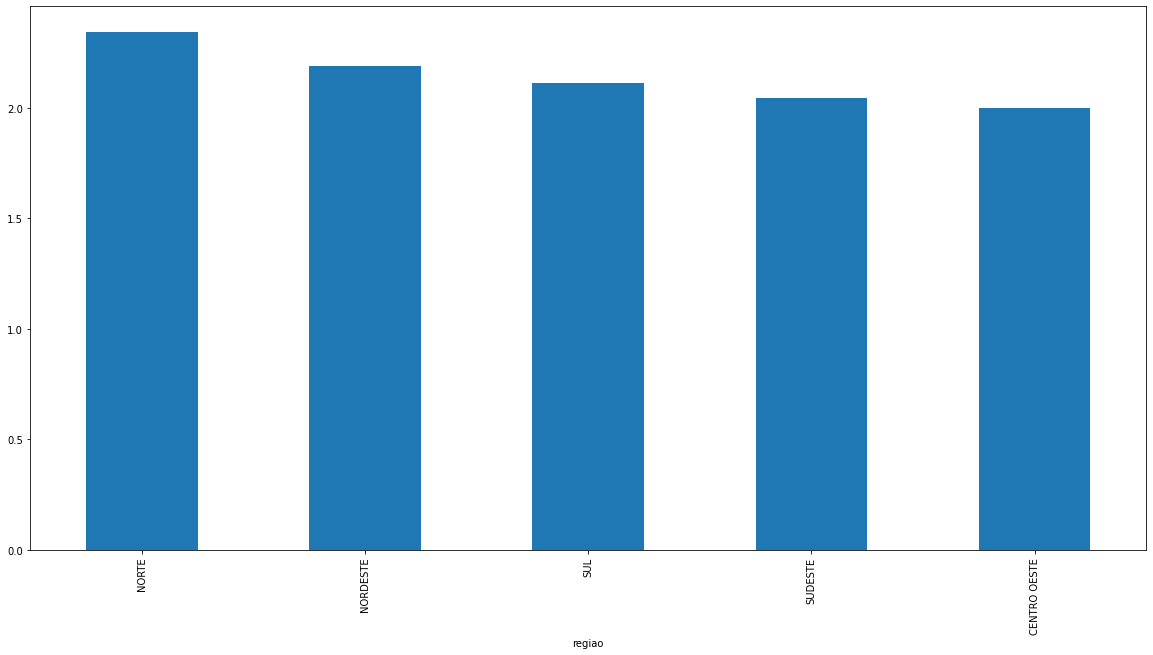

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['regiao'])['preco_medio_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [ ]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

#### GLP

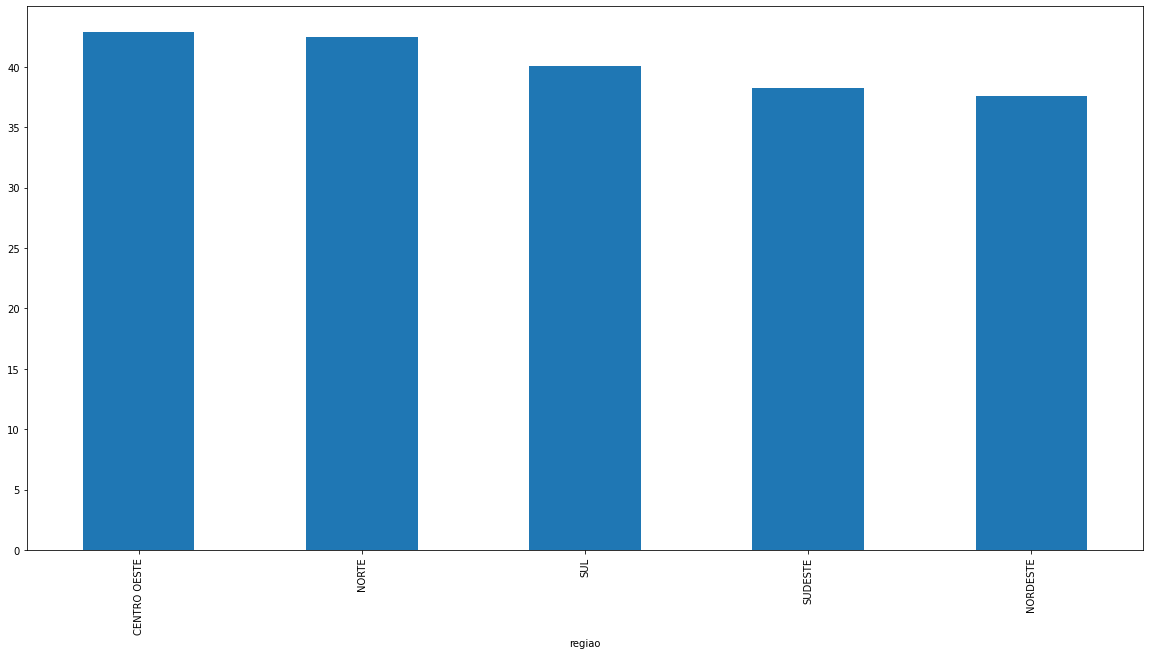

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GLP'].groupby(['regiao'])['preco_medio_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [ ]:
gas_prices_brazil_df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

#### GNV

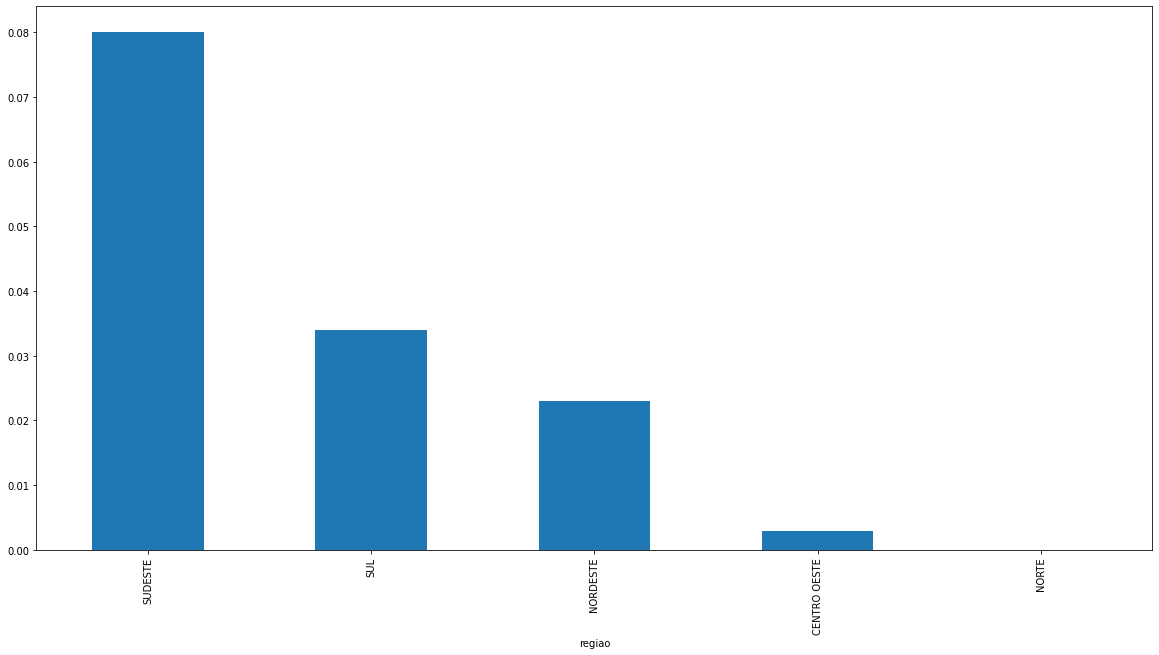

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['regiao'])['coef_variacao_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel

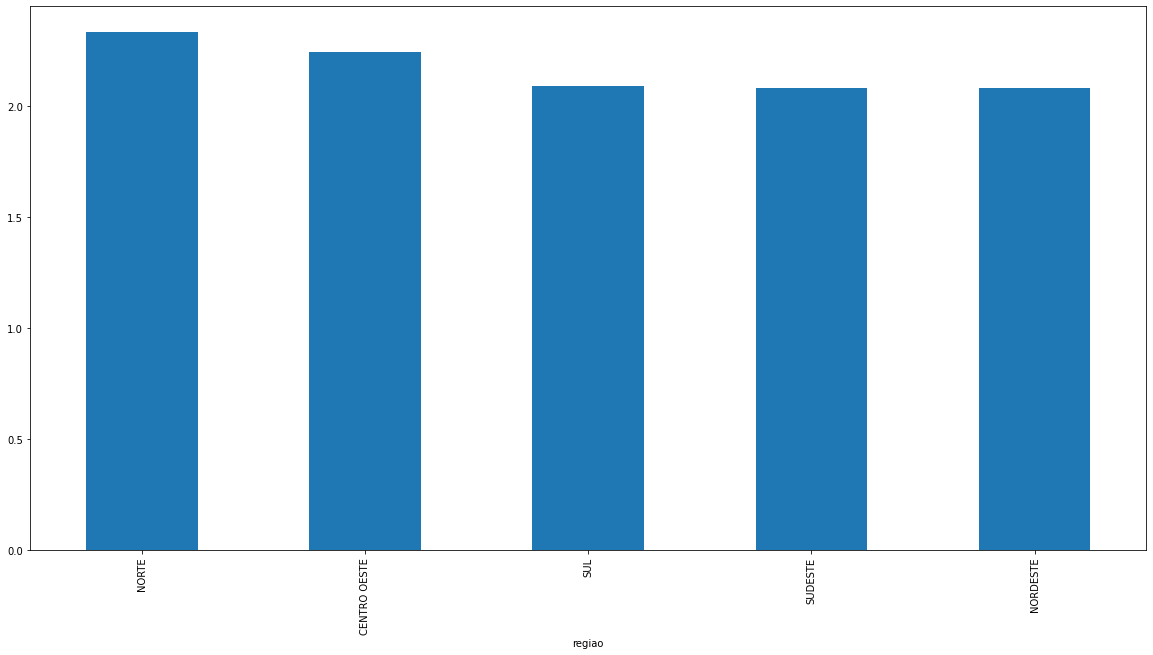

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL'].groupby(['regiao'])['preco_medio_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel S10

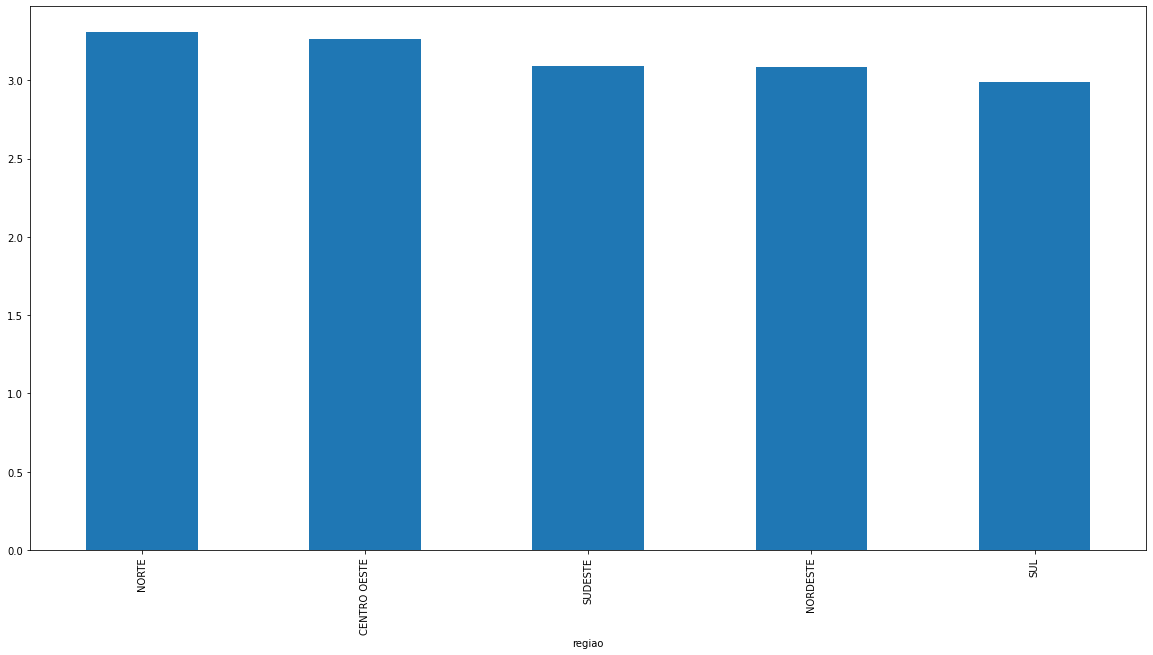

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10'].groupby(['regiao'])['preco_medio_revenda'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Agg Var

#### Etanol Hidratado

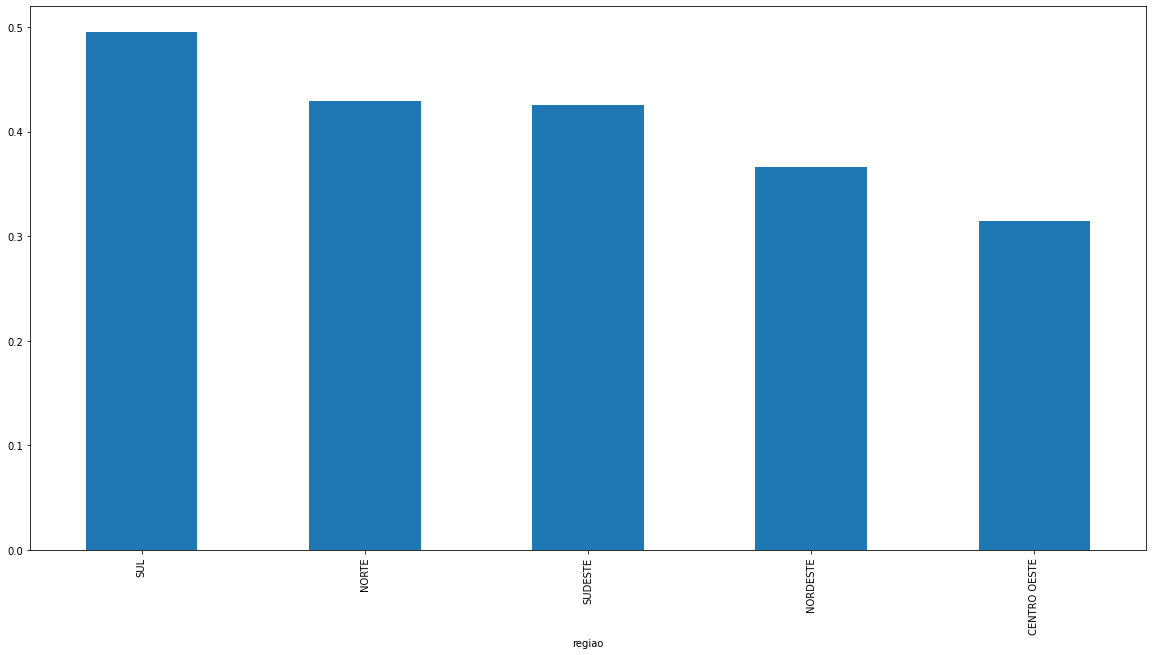

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['regiao'])['preco_medio_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Gasolina Comum

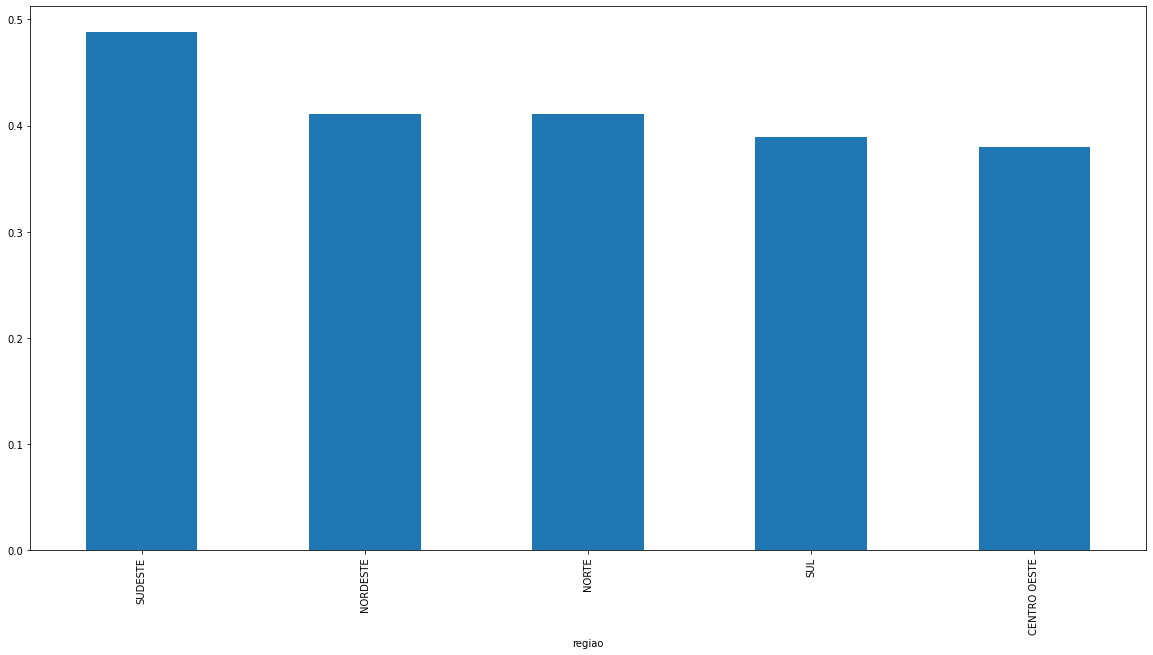

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['regiao'])['preco_medio_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### GLP

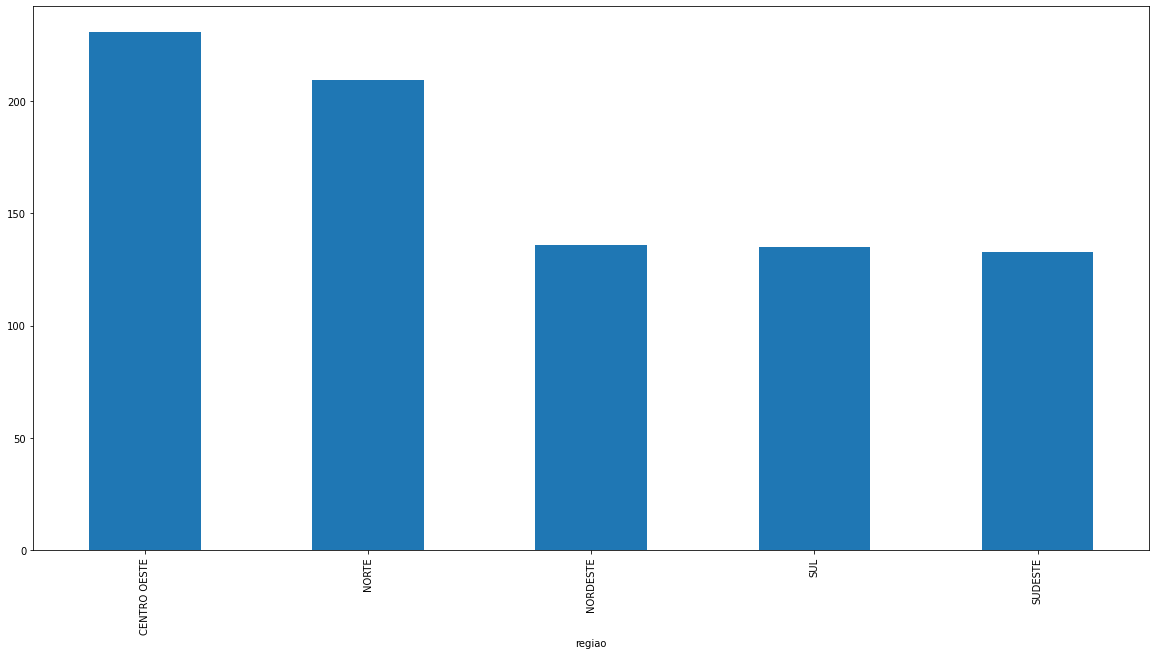

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GLP'].groupby(['regiao'])['preco_medio_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### GNV

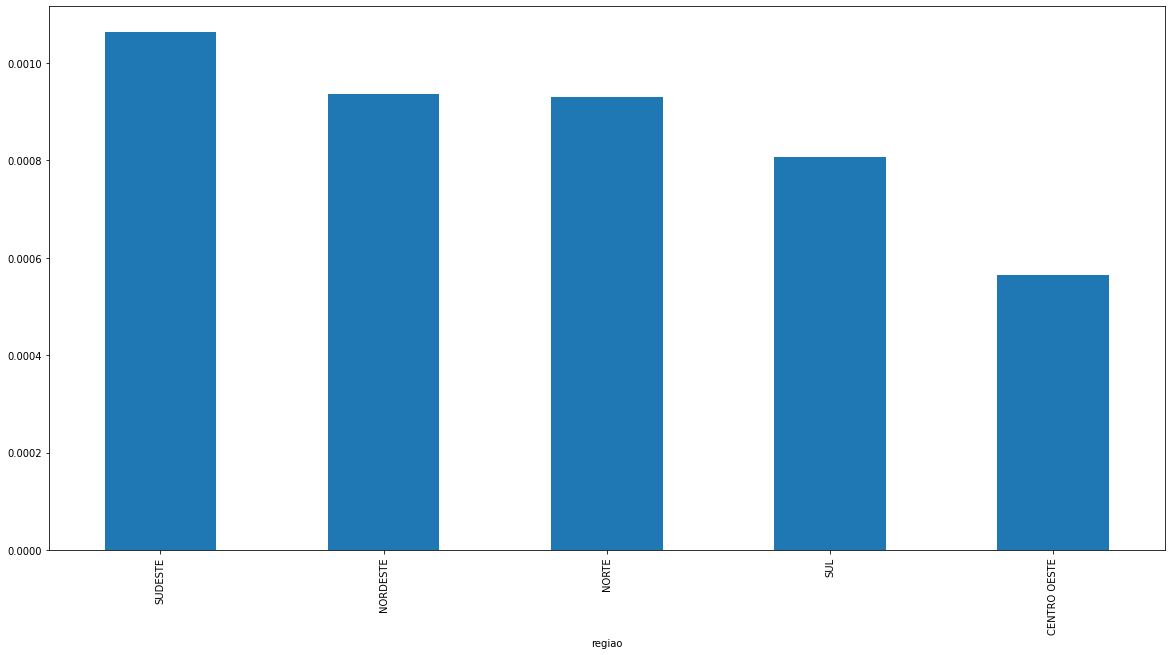

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['regiao'])['coef_variacao_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel

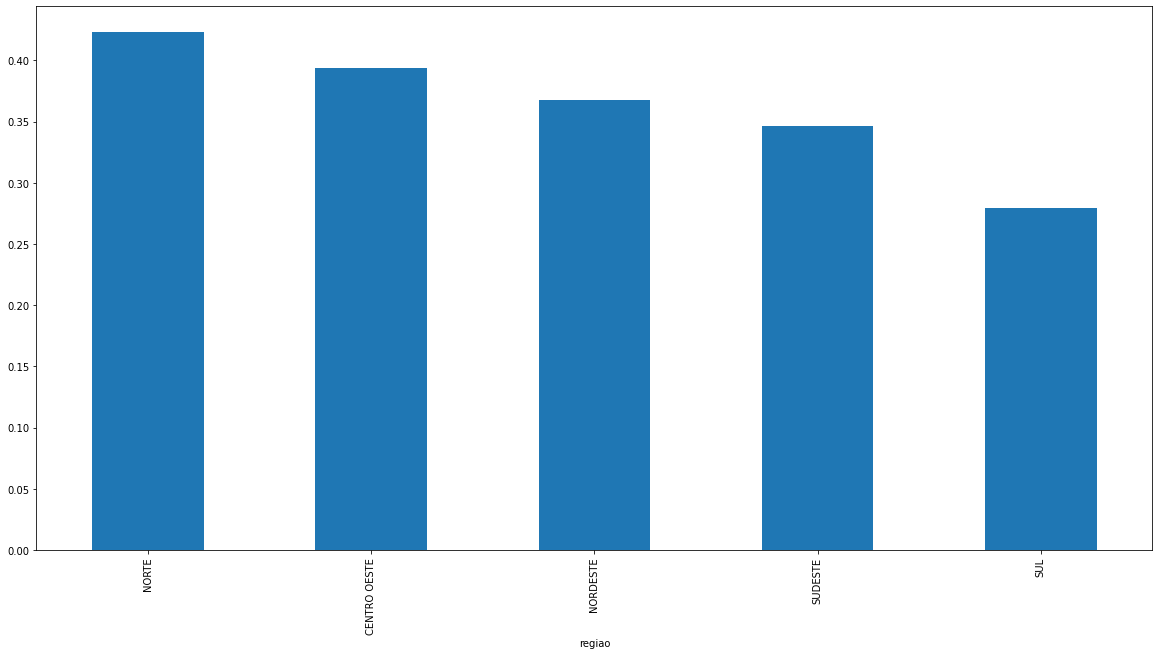

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL'].groupby(['regiao'])['preco_medio_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel S10

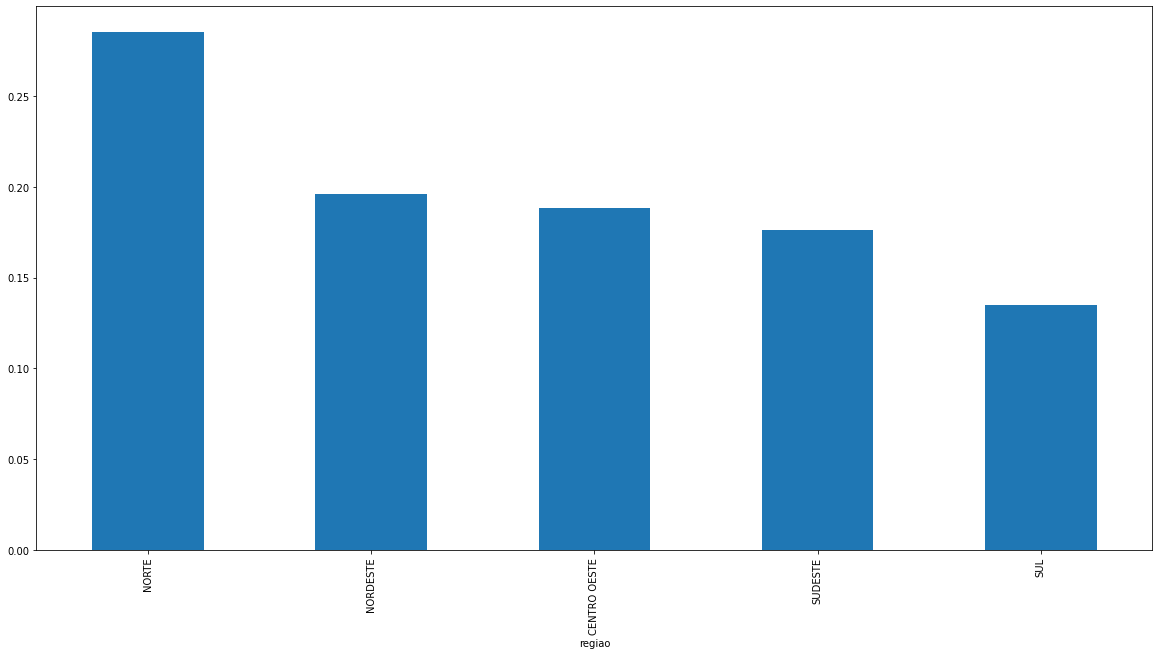

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10'].groupby(['regiao'])['preco_medio_revenda'].var().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Agg Std

#### Etanol Hidratado

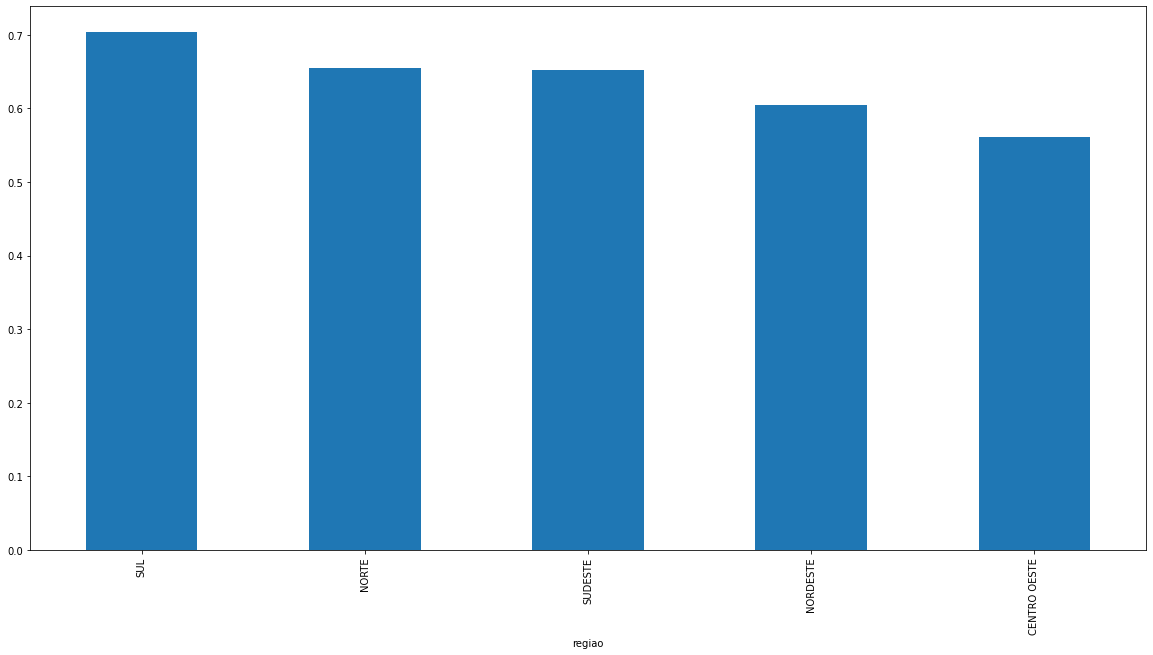

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ETANOL HIDRATADO'].groupby(['regiao'])['preco_medio_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Gasolina Comum

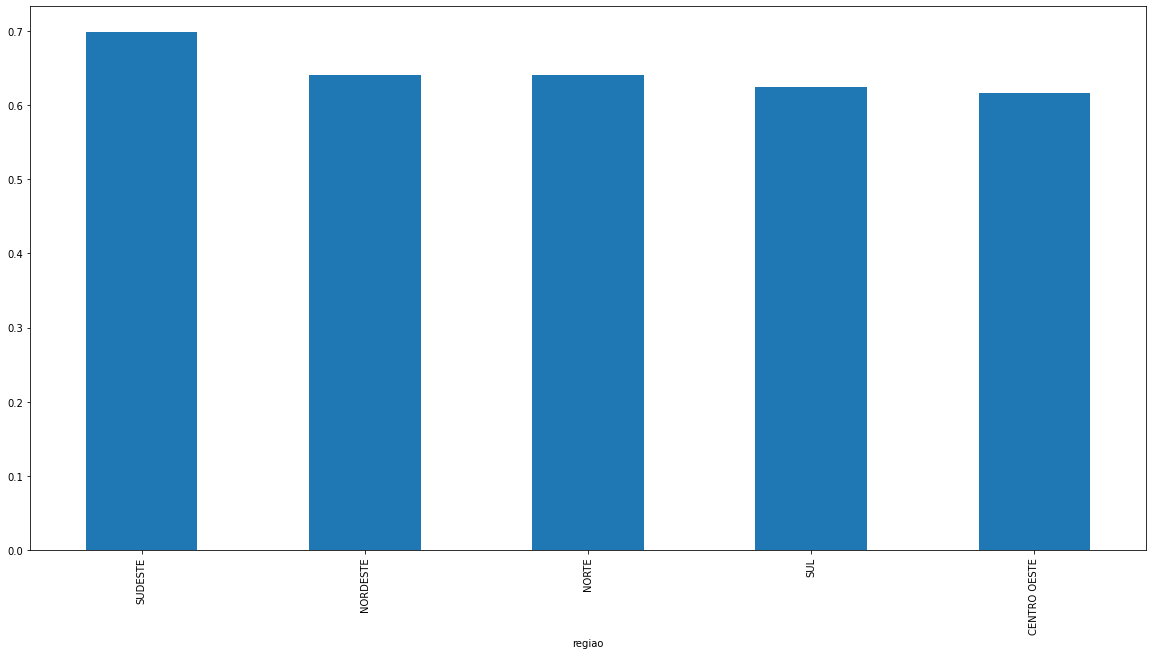

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GASOLINA COMUM'].groupby(['regiao'])['preco_medio_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### GLP

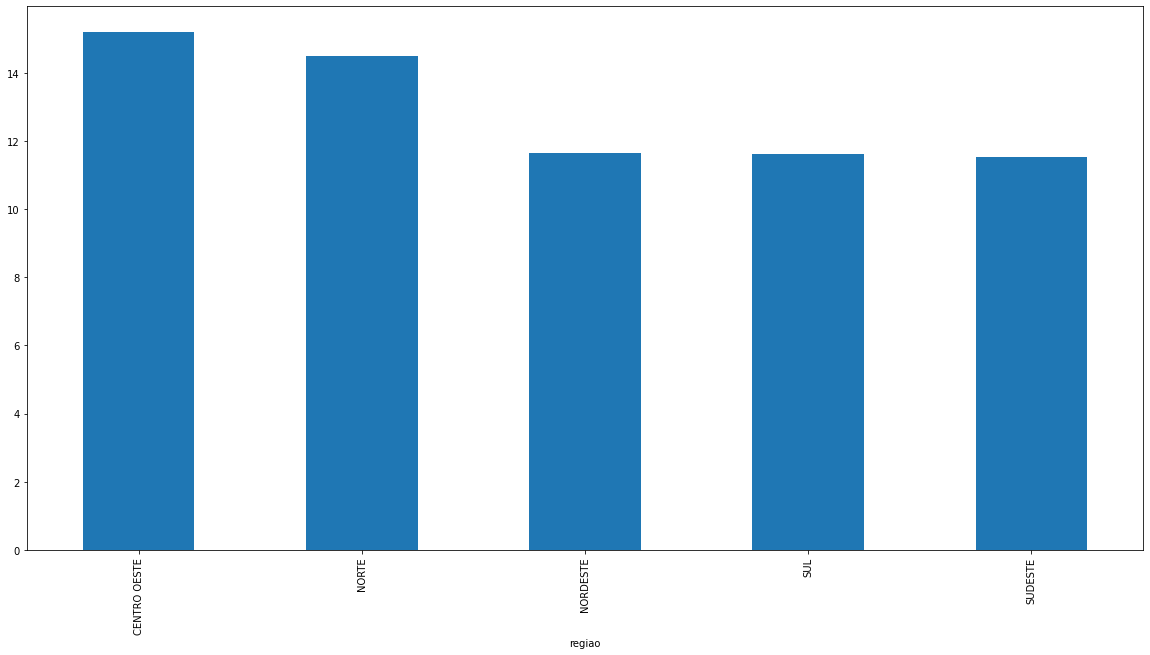

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GLP'].groupby(['regiao'])['preco_medio_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### GNV

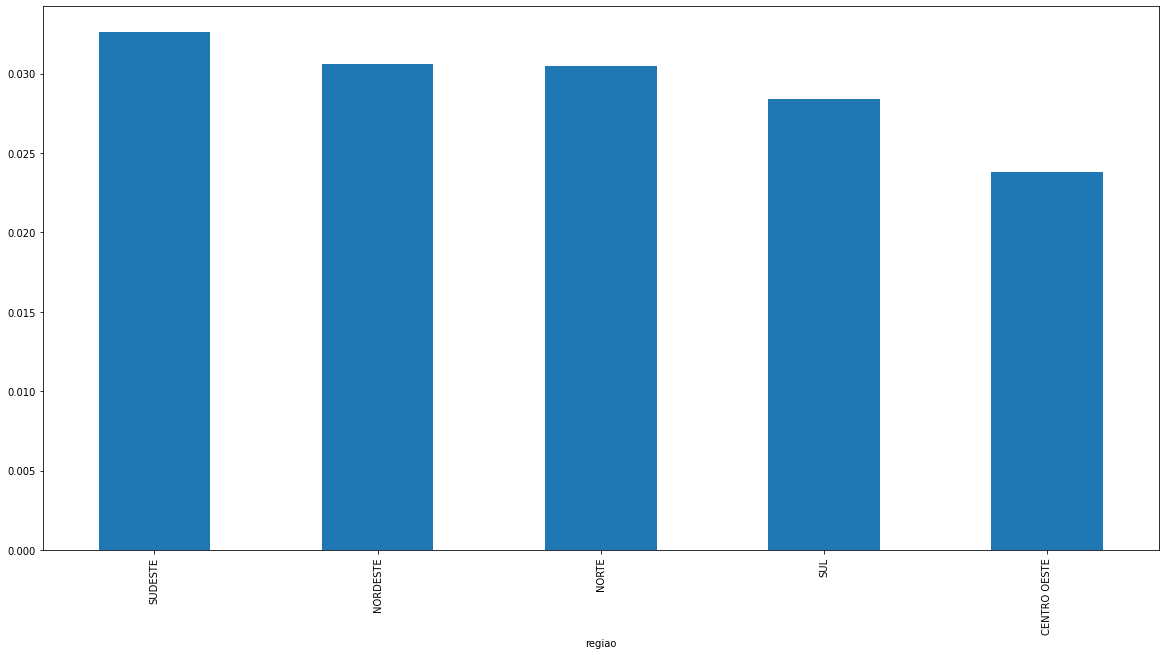

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='GNV'].groupby(['regiao'])['coef_variacao_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel

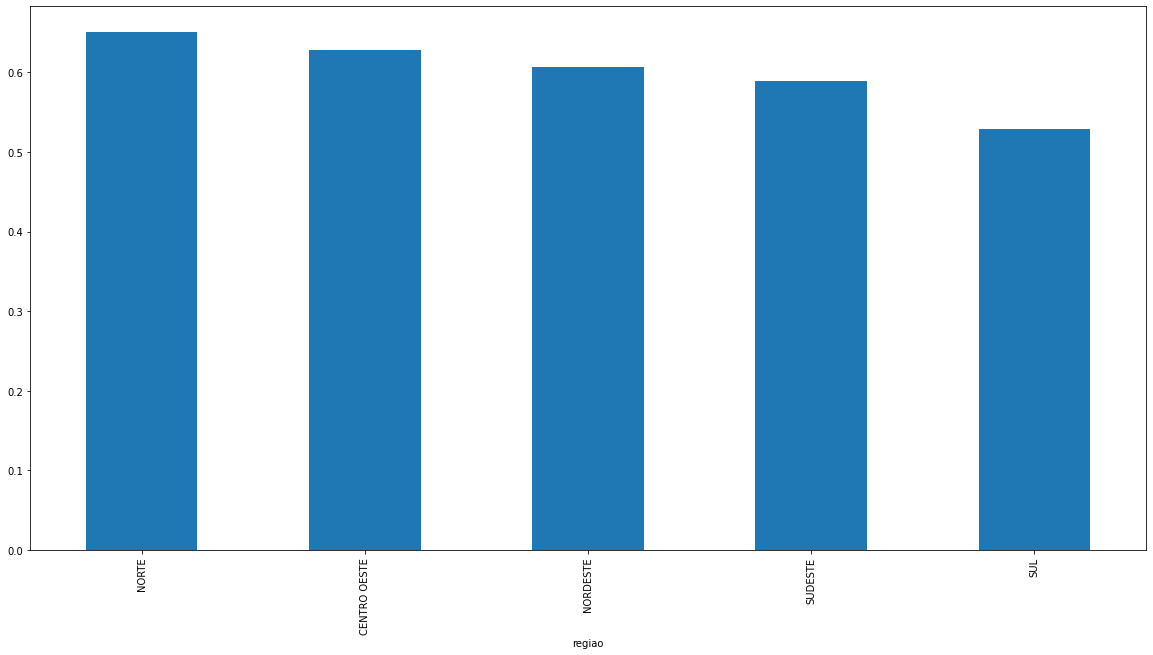

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL'].groupby(['regiao'])['preco_medio_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

#### Óleo Diesel S10

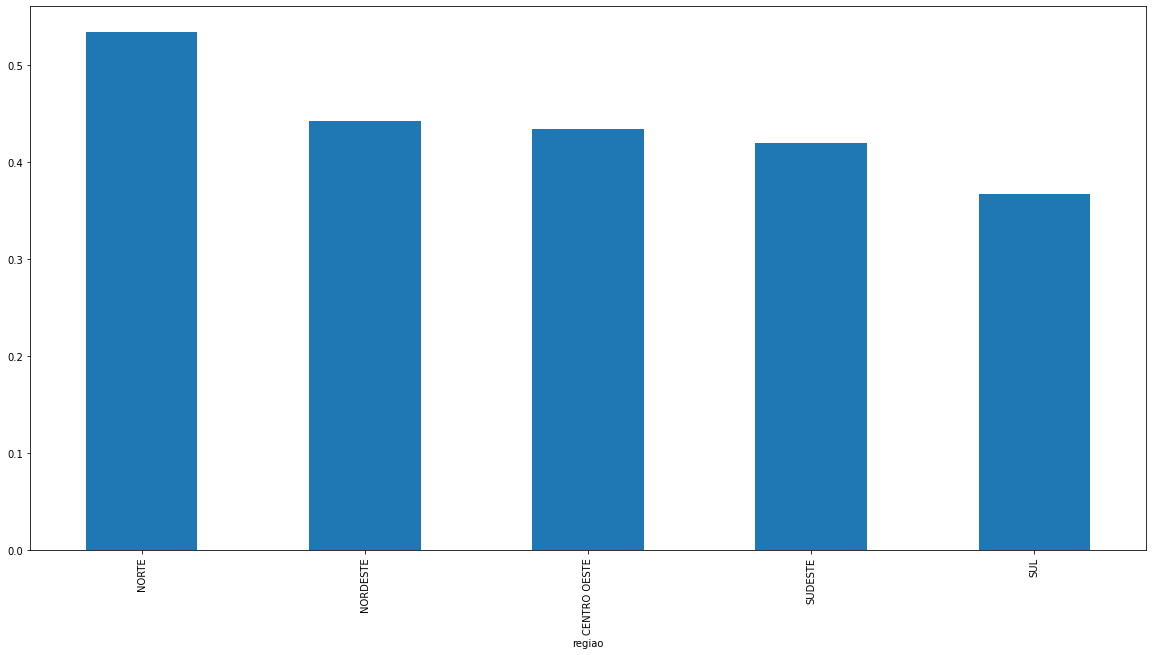

In [ ]:
gas_prices_brazil_df[gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10'].groupby(['regiao'])['preco_medio_revenda'].std().sort_values(ascending=False).plot.bar(figsize=(20,10))

### Describe Statiscal by Region

In [ ]:
interess_columns = ['numero_posto_pesquisado',	'preco_medio_revenda',	'coef_variacao_revenda', 'desvio_padrao_revenda', 'preco_minimo_revenda']

#### Nordeste

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='ETANOL HIDRATADO')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='GASOLINA COMUM')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='GLP')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='GNV')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORDESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10')][interess_columns].describe()

#### Norte

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='ETANOL HIDRATADO')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='GASOLINA COMUM')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='GLP')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='GNV')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'NORTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10')][interess_columns].describe()

#### Centro-Oeste

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='ETANOL HIDRATADO')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,154.982484,2.135950,0.055482,0.111622,1.927421
std,79.962627,0.561154,0.031299,0.054694,0.549582
min,1.000000,1.162000,0.000000,0.000000,0.870000
25%,87.000000,1.716000,0.038000,0.080000,1.540000
50%,140.000000,2.001000,0.053000,0.111000,1.800000
75%,205.250000,2.479000,0.071000,0.145000,2.270000
max,487.000000,3.999000,0.212000,0.336000,3.999000


In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='GASOLINA COMUM')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,155.204777,3.078123,0.033592,0.103984,2.867660
std,80.280425,0.616315,0.018085,0.058923,0.583086
min,1.000000,1.936000,0.000000,0.000000,1.730000
25%,88.000000,2.668000,0.024000,0.067000,2.479000
50%,139.000000,2.856000,0.033000,0.102000,2.700000
75%,205.000000,3.460250,0.045000,0.145000,3.189000
max,492.000000,4.963000,0.095000,0.312000,4.849000


In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='GLP')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000
mean,200.619063,48.181149,0.057588,2.904754,40.957995
std,147.639427,15.189152,0.019181,1.678944,11.446404
min,1.000000,28.791000,0.000000,0.000000,24.900000
25%,106.000000,37.340000,0.047000,1.925000,33.000000
50%,130.000000,42.857000,0.058000,2.402000,38.000000
75%,221.000000,55.905000,0.070000,3.694000,45.000000
max,766.000000,99.357000,0.137000,9.842000,90.000000


In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='GNV')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,2.880499,2.004153,0.012368,0.025300,1.980121
std,1.944069,0.457802,0.023778,0.048291,0.450621
min,1.000000,1.097000,0.000000,0.000000,1.090000
25%,1.000000,1.599000,0.000000,0.000000,1.594500
50%,2.000000,1.955000,0.003000,0.005000,1.940000
75%,4.000000,2.352500,0.017000,0.035000,2.299000
max,10.000000,3.890000,0.262000,0.530000,3.890000


In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,131.744268,2.481534,0.032104,0.081501,2.310914
std,77.911623,0.627607,0.010553,0.039698,0.576417
min,1.000000,1.435000,0.000000,0.000000,1.270000
25%,78.000000,2.033000,0.028000,0.062000,1.909750
50%,116.000000,2.245500,0.033000,0.075000,2.070000
75%,174.000000,3.019000,0.038000,0.101000,2.810000
max,430.000000,4.162000,0.077000,0.279000,3.969000


In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'CENTRO OESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10')][interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,desvio_padrao_revenda,preco_minimo_revenda
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,71.498888,3.241185,0.030342,0.100953,3.034001
std,40.459483,0.433797,0.012452,0.047255,0.367446
min,1.000000,2.212000,0.000000,0.000000,2.039000
25%,34.000000,2.820000,0.025000,0.072000,2.720000
50%,70.000000,3.264000,0.032000,0.103000,3.050000
75%,99.000000,3.584000,0.038000,0.130000,3.290000
max,185.000000,4.200000,0.103000,0.400000,3.990000


#### Sudeste

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='ETANOL HIDRATADO')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='GASOLINA COMUM')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='GLP')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='GNV')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUDESTE') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10')][interess_columns].describe()

#### Sul

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='ETANOL HIDRATADO')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='GASOLINA COMUM')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='GLP')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='GNV')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL')][interess_columns].describe()

In [ ]:
gas_prices_brazil_df[(gas_prices_brazil_df['regiao'] == 'SUL') & (gas_prices_brazil_df['produto']=='ÓLEO DIESEL S10')][interess_columns].describe()

# Before Notebook

In [ ]:
gas_prices_brazil_df.dtypes

Unnamed: 0                      int64
regiao                         object
estado                         object
produto                        object
numero_posto_pesquisado         int64
preco_medio_revenda           float64
coef_variacao_revenda         float64
preco_medio_distribuicao       object
coef_variacao_distribuicao     object
data_inicial                   object
data_final                     object
mes                             int64
ano                             int64
desvio_padrao_revenda         float64
preco_minimo_revenda          float64
preco_maximo_revenda          float64
margem_media_revenda           object
desvio_padrao_distribuicao     object
preco_minimo_distribuicao      object
preco_maximo_distribuicao      object
unidade_de_medida              object
dtype: object

In [ ]:

# values from preco_medio_distribuicao column contains "-"
gas_prices_brazil_df['preco_medio_distribuicao'] = gas_prices_brazil_df['preco_medio_distribuicao'].apply(lambda x : 0 if x == '-' else x)

gas_prices_brazil_df['preco_medio_distribuicao'] = pd.to_numeric(gas_prices_brazil_df['preco_medio_distribuicao'], downcast='float')
# values from coef_variacao_distribuicao column contains "-"
gas_prices_brazil_df['coef_variacao_distribuicao'] = gas_prices_brazil_df['coef_variacao_distribuicao'].apply(lambda x : 0 if x == '-' else x)


gas_prices_brazil_df['coef_variacao_distribuicao'] = pd.to_numeric(gas_prices_brazil_df['coef_variacao_distribuicao'], downcast='float')

gas_prices_brazil_df['desvio_padrao_revenda'] = pd.to_numeric(gas_prices_brazil_df['desvio_padrao_revenda'], downcast='float')
gas_prices_brazil_df['preco_minimo_revenda'] = pd.to_numeric(gas_prices_brazil_df['preco_minimo_revenda'], downcast='float')
gas_prices_brazil_df['preco_maximo_revenda'] = pd.to_numeric(gas_prices_brazil_df['preco_maximo_revenda'], downcast='float')

# values from margem_media_revenda column contains "-"
gas_prices_brazil_df['margem_media_revenda'] = gas_prices_brazil_df['margem_media_revenda'].apply(lambda x : 0 if x == '-' else x)
gas_prices_brazil_df['margem_media_revenda'] = pd.to_numeric(gas_prices_brazil_df['margem_media_revenda'], downcast='float')

# values from margem_media_revenda column contains "-"
gas_prices_brazil_df['margem_media_revenda'] = pd.to_numeric(gas_prices_brazil_df['margem_media_revenda'], downcast='float')
gas_prices_brazil_df['margem_media_revenda'] = gas_prices_brazil_df['margem_media_revenda'].apply(lambda x : 0 if x == '-' else x)

gas_prices_brazil_df['desvio_padrao_distribuicao'] = gas_prices_brazil_df['desvio_padrao_distribuicao'].apply(lambda x : 0 if x == '-' else x)

gas_prices_brazil_df['desvio_padrao_distribuicao'] = pd.to_numeric(gas_prices_brazil_df['desvio_padrao_distribuicao'], downcast='float')

# values from margem_media_revenda column contains "-"
gas_prices_brazil_df['preco_minimo_distribuicao'] = gas_prices_brazil_df['preco_minimo_distribuicao'].apply(lambda x : 0 if x == '-' else x)
gas_prices_brazil_df['preco_minimo_distribuicao'] = pd.to_numeric(gas_prices_brazil_df['preco_minimo_distribuicao'], downcast='float')

# values from margem_media_revenda column contains "-"
gas_prices_brazil_df['preco_maximo_distribuicao'] = gas_prices_brazil_df['preco_maximo_distribuicao'].apply(lambda x : 0 if x == '-' else x)
gas_prices_brazil_df['preco_maximo_distribuicao'] = pd.to_numeric(gas_prices_brazil_df['preco_maximo_distribuicao'], downcast='float')



In [ ]:
gas_prices_brazil_df.dtypes

Unnamed: 0                      int64
regiao                         object
estado                         object
produto                        object
numero_posto_pesquisado         int64
preco_medio_revenda           float64
coef_variacao_revenda         float64
preco_medio_distribuicao      float32
coef_variacao_distribuicao    float32
data_inicial                   object
data_final                     object
mes                             int64
ano                             int64
desvio_padrao_revenda         float32
preco_minimo_revenda          float32
preco_maximo_revenda          float32
margem_media_revenda          float64
desvio_padrao_distribuicao    float32
preco_minimo_distribuicao     float32
preco_maximo_distribuicao     float32
unidade_de_medida              object
dtype: object

# Transform to categories

In [ ]:
gas_prices_brazil_df['regiao'] = gas_prices_brazil_df['regiao'].astype('category')
gas_prices_brazil_df['estado'] = gas_prices_brazil_df['estado'].astype('category')
gas_prices_brazil_df['produto'] = gas_prices_brazil_df['produto'].astype('category')

# Transform Category to Code

In [ ]:
gas_prices_brazil_df['regiao_code'] = gas_prices_brazil_df['regiao'].cat.codes
gas_prices_brazil_df['estado_code'] = gas_prices_brazil_df['estado'].cat.codes
gas_prices_brazil_df['produto_code'] = gas_prices_brazil_df['produto'].cat.codes

In [ ]:
gas_prices_brazil_df[['regiao_code', 'estado_code', 'produto_code']].head()

,regiao_code,estado_code,produto_code
0,0,6,0
1,0,8,0
2,0,10,0
3,0,11,0
4,1,1,0


# Check Null Values

In [ ]:
gas_prices_brazil_df.isnull().sum()

Unnamed: 0                    0
regiao                        0
estado                        0
produto                       0
numero_posto_pesquisado       0
preco_medio_revenda           0
coef_variacao_revenda         0
preco_medio_distribuicao      0
coef_variacao_distribuicao    0
data_inicial                  0
data_final                    0
mes                           0
ano                           0
desvio_padrao_revenda         0
preco_minimo_revenda          0
preco_maximo_revenda          0
margem_media_revenda          0
desvio_padrao_distribuicao    0
preco_minimo_distribuicao     0
preco_maximo_distribuicao     0
unidade_de_medida             0
regiao_code                   0
estado_code                   0
produto_code                  0
dtype: int64

In [ ]:
gas_prices_brazil_df.shape

(106823, 24)

### Check Types

In [ ]:
gas_prices_brazil_df.dtypes

Unnamed: 0                       int64
regiao                        category
estado                        category
produto                       category
numero_posto_pesquisado          int64
preco_medio_revenda            float64
coef_variacao_revenda          float64
preco_medio_distribuicao       float32
coef_variacao_distribuicao     float32
data_inicial                    object
data_final                      object
mes                              int64
ano                              int64
desvio_padrao_revenda          float32
preco_minimo_revenda           float32
preco_maximo_revenda           float32
margem_media_revenda           float64
desvio_padrao_distribuicao     float32
preco_minimo_distribuicao      float32
preco_maximo_distribuicao      float32
unidade_de_medida               object
regiao_code                       int8
estado_code                       int8
produto_code                      int8
dtype: object

### Check Correlation

In [ ]:
 interess_columns  = ['numero_posto_pesquisado', 'preco_medio_revenda', 'coef_variacao_revenda', 'preco_medio_distribuicao', 'coef_variacao_distribuicao']

gas_prices_brazil_df[interess_columns].corr(method='spearman')

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
numero_posto_pesquisado,1.000000,0.032969,0.294354,0.120888,0.165392
preco_medio_revenda,0.032969,1.000000,0.189490,0.926830,0.061463
coef_variacao_revenda,0.294354,0.189490,1.000000,0.185918,0.474178
preco_medio_distribuicao,0.120888,0.926830,0.185918,1.000000,0.126634
coef_variacao_distribuicao,0.165392,0.061463,0.474178,0.126634,1.000000


### Describe Statiscal Info

In [ ]:
gas_prices_brazil_df[interess_columns].describe()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000
mean,233.770976,10.870780,0.045418,8.285548,0.045151
std,403.282519,17.752533,0.025066,13.469183,0.042258
min,1.000000,0.766000,0.000000,0.000000,0.000000
25%,42.000000,2.072000,0.029000,1.745000,0.020000
50%,104.000000,2.718000,0.041000,2.303000,0.030000
75%,243.000000,3.752000,0.058000,3.265000,0.059000
max,4167.000000,99.357000,0.395000,83.137001,0.780000


## Normalization

In [ ]:
import numpy as np

In [ ]:
interess_columns  = ['numero_posto_pesquisado', 'preco_medio_revenda', 'coef_variacao_revenda', 'preco_medio_distribuicao', 'coef_variacao_distribuicao']
num_gas_prices_brazil_df = gas_prices_brazil_df[interess_columns]

dist = np.linalg.norm(num_gas_prices_brazil_df.values[1]-num_gas_prices_brazil_df.values[2])
dist

195.00024474601886

In [ ]:
norm_gas_prices_brazil_df =  (num_gas_prices_brazil_df - num_gas_prices_brazil_df.min()) / (num_gas_prices_brazil_df.max() - num_gas_prices_brazil_df.min())
norm_gas_prices_brazil_df.head()

,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao
0,0.030245,0.005295,0.030380,0.009923,0.170513
1,0.092655,0.004017,0.248101,0.009178,0.147436
2,0.045847,0.006319,0.177215,0.011667,0.125641
3,0.038646,0.005031,0.139241,0.009984,0.183333
4,0.024484,0.004209,0.167089,0.011319,0.105128


In [ ]:
dist = np.linalg.norm(norm_gas_prices_brazil_df.values[1]-norm_gas_prices_brazil_df.values[2])
dist

0.08776271537704362

In [ ]:
gas_prices_brazil_df['numero_posto_pesquisado_norm'] = (gas_prices_brazil_df['numero_posto_pesquisado'] - gas_prices_brazil_df['numero_posto_pesquisado'].min()) / (gas_prices_brazil_df['numero_posto_pesquisado'].max() - gas_prices_brazil_df['numero_posto_pesquisado'].min())

gas_prices_brazil_df['numero_posto_pesquisado_norm'].describe()


count    106823.000000
mean          0.055874
std           0.096803
min           0.000000
25%           0.009842
50%           0.024724
75%           0.058089
max           1.000000
Name: numero_posto_pesquisado_norm, dtype: float64

### preco_medio_revenda_norm

In [ ]:
gas_prices_brazil_df['preco_medio_revenda_norm'] = (gas_prices_brazil_df['preco_medio_revenda'] - gas_prices_brazil_df['preco_medio_revenda'].min()) / (gas_prices_brazil_df['preco_medio_revenda'].max() - gas_prices_brazil_df['preco_medio_revenda'].min())
gas_prices_brazil_df['preco_medio_revenda_norm'].describe()


count    106823.000000
mean          0.102492
std           0.180062
min           0.000000
25%           0.013247
50%           0.019799
75%           0.030287
max           1.000000
Name: preco_medio_revenda_norm, dtype: float64

### coef_variacao_revenda_norm

In [ ]:
gas_prices_brazil_df['coef_variacao_revenda_norm'] = (gas_prices_brazil_df['coef_variacao_revenda'] - gas_prices_brazil_df['coef_variacao_revenda'].min()) / (gas_prices_brazil_df['coef_variacao_revenda'].max() - gas_prices_brazil_df['coef_variacao_revenda'].min())
gas_prices_brazil_df['coef_variacao_revenda_norm'].describe()


count    106823.000000
mean          0.114982
std           0.063459
min           0.000000
25%           0.073418
50%           0.103797
75%           0.146835
max           1.000000
Name: coef_variacao_revenda_norm, dtype: float64

### preco_medio_distribuicao_norm

In [ ]:
gas_prices_brazil_df['preco_medio_distribuicao_norm'] = (gas_prices_brazil_df['preco_medio_distribuicao'] - gas_prices_brazil_df['preco_medio_distribuicao'].min()) / (gas_prices_brazil_df['preco_medio_distribuicao'].max() - gas_prices_brazil_df['preco_medio_distribuicao'].min())
gas_prices_brazil_df['preco_medio_distribuicao_norm'].describe()


count    106823.000000
mean          0.099662
std           0.162010
min           0.000000
25%           0.020989
50%           0.027701
75%           0.039273
max           1.000000
Name: preco_medio_distribuicao_norm, dtype: float64

### coef_variacao_distribuicao_norm

In [ ]:
gas_prices_brazil_df['coef_variacao_distribuicao_norm'] = (gas_prices_brazil_df['coef_variacao_distribuicao'] - gas_prices_brazil_df['coef_variacao_distribuicao'].min()) / (gas_prices_brazil_df['coef_variacao_distribuicao'].max() - gas_prices_brazil_df['coef_variacao_distribuicao'].min())
gas_prices_brazil_df['coef_variacao_distribuicao_norm'].describe()


count    106823.000000
mean          0.057887
std           0.054177
min           0.000000
25%           0.025641
50%           0.038462
75%           0.075641
max           1.000000
Name: coef_variacao_distribuicao_norm, dtype: float64

## Discretation 

### preco_medio_revenda_dist

In [ ]:
gas_prices_brazil_df['preco_medio_revenda_dist'] = pd.cut(gas_prices_brazil_df['preco_medio_revenda'],10)

In [ ]:
gas_prices_brazil_df['preco_medio_revenda_dist'].value_counts()

(0.667, 10.625]     85637
(30.343, 40.202]     9705
(40.202, 50.062]     4813
(50.062, 59.921]     2477
(59.921, 69.78]      1844
(69.78, 79.639]      1107
(20.484, 30.343]      951
(79.639, 89.498]      199
(89.498, 99.357]       90
(10.625, 20.484]        0
Name: preco_medio_revenda_dist, dtype: int64

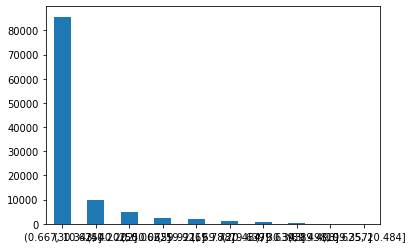

In [ ]:
counts = gas_prices_brazil_df['preco_medio_revenda_dist'].value_counts()
counts.plot.bar(rot=0)

In [ ]:
gas_prices_brazil_df['preco_medio_revenda_dist'] = pd.cut(gas_prices_brazil_df['preco_medio_revenda'],4)

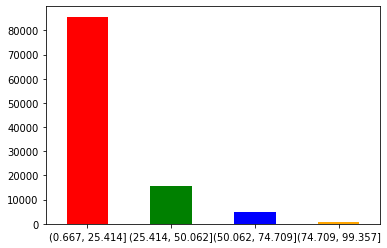

In [ ]:
counts = gas_prices_brazil_df['preco_medio_revenda_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### coef_variacao_revenda_dist

In [ ]:
gas_prices_brazil_df['coef_variacao_revenda_dist'] = pd.cut(gas_prices_brazil_df['coef_variacao_revenda'],10)

In [ ]:
gas_prices_brazil_df['coef_variacao_revenda_dist'].value_counts()

(-0.000395, 0.0395]    49520
(0.0395, 0.079]        47313
(0.079, 0.118]          8607
(0.118, 0.158]          1262
(0.158, 0.198]           102
(0.198, 0.237]            13
(0.237, 0.276]             3
(0.356, 0.395]             1
(0.316, 0.356]             1
(0.276, 0.316]             1
Name: coef_variacao_revenda_dist, dtype: int64

In [ ]:
gas_prices_brazil_df['coef_variacao_revenda_dist'] = pd.cut(gas_prices_brazil_df['coef_variacao_revenda'],4)

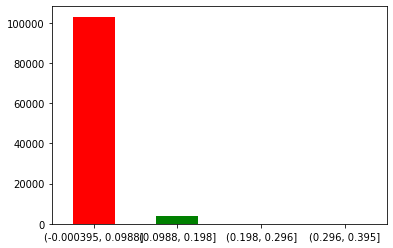

In [ ]:
counts = gas_prices_brazil_df['coef_variacao_revenda_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### preco_medio_distribuicao_dist

In [ ]:
gas_prices_brazil_df['preco_medio_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['preco_medio_distribuicao'],10)

In [ ]:
gas_prices_brazil_df['preco_medio_distribuicao_dist'].value_counts()

(-0.0831, 8.314]    86507
(24.941, 33.255]    10621
(33.255, 41.569]     4582
(41.569, 49.882]     1973
(49.882, 58.196]     1360
(16.627, 24.941]     1136
(58.196, 66.51]       434
(66.51, 74.823]       178
(74.823, 83.137]       32
(8.314, 16.627]         0
Name: preco_medio_distribuicao_dist, dtype: int64

In [ ]:
gas_prices_brazil_df['preco_medio_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['preco_medio_distribuicao'],4)

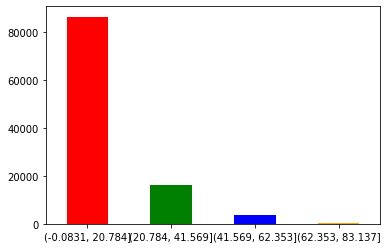

In [ ]:
counts = gas_prices_brazil_df['preco_medio_distribuicao_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

### coef_variacao_distribuicao_dist

In [ ]:
gas_prices_brazil_df['coef_variacao_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['coef_variacao_distribuicao'],10)

In [ ]:
gas_prices_brazil_df['coef_variacao_distribuicao_dist'].value_counts()

(-0.00078, 0.078]    88240
(0.078, 0.156]       15904
(0.156, 0.234]        2315
(0.234, 0.312]         245
(0.312, 0.39]           57
(0.39, 0.468]           37
(0.468, 0.546]          12
(0.546, 0.624]          11
(0.702, 0.78]            1
(0.624, 0.702]           1
Name: coef_variacao_distribuicao_dist, dtype: int64

In [ ]:
gas_prices_brazil_df['coef_variacao_distribuicao_dist'] = pd.cut(gas_prices_brazil_df['coef_variacao_distribuicao'],4)

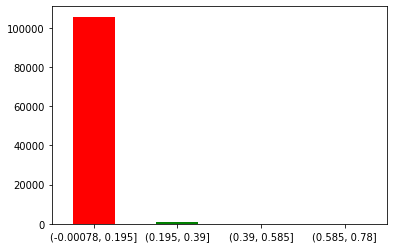

In [ ]:
counts = gas_prices_brazil_df['coef_variacao_distribuicao_dist'].value_counts()
counts.plot.bar(rot=0, color=['red','green', 'blue', 'orange'])

## Export Format Dataset

In [ ]:
gas_prices_brazil_df.to_csv('norm_dist_gas_prices_brazil.csv')

### Info Dataframe

In [ ]:
gas_prices_brazil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     106823 non-null  int64  
 1   DATA INICIAL                   106823 non-null  object 
 2   DATA FINAL                     106823 non-null  object 
 3   REGIÃO                         106823 non-null  object 
 4   ESTADO                         106823 non-null  object 
 5   PRODUTO                        106823 non-null  object 
 6   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 7   UNIDADE DE MEDIDA              106823 non-null  object 
 8   PREÇO MÉDIO REVENDA            106823 non-null  float64
 9   DESVIO PADRÃO REVENDA          106823 non-null  float64
 10  PREÇO MÍNIMO REVENDA           106823 non-null  float64
 11  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 12  MARGEM MÉDIA REVENDA          

### Visualize the fifth intances

In [ ]:
gas_prices_brazil_df.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


### Describe statiscal 

In [ ]:
gas_prices_brazil_df.describe()

,Unnamed: 0,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,MÊS,ANO
count,106823.00000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000
mean,53411.00000,233.770976,10.870780,0.657227,9.416038,12.537731,0.045418,6.484006,2011.802271
std,30837.28824,403.282519,17.752533,1.349169,15.092193,20.841497,0.025066,3.443391,4.391530
min,0.00000,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000,1.000000,2004.000000
25%,26705.50000,42.000000,2.072000,0.072000,1.900000,2.310000,0.029000,4.000000,2008.000000
50%,53411.00000,104.000000,2.718000,0.114000,2.510000,2.999000,0.041000,6.000000,2012.000000
75%,80116.50000,243.000000,3.752000,0.191000,3.499000,4.150000,0.058000,9.000000,2016.000000
max,106822.00000,4167.000000,99.357000,10.748000,90.000000,120.000000,0.395000,12.000000,2019.000000


### Select multiple Columns

In [ ]:
columns_gas_prices_brazil_df = gas_prices_brazil_df.columns.to_list()
columns_gas_prices_brazil_df

['Unnamed: 0',
 'DATA INICIAL',
 'DATA FINAL',
 'REGIÃO',
 'ESTADO',
 'PRODUTO',
 'NÚMERO DE POSTOS PESQUISADOS',
 'UNIDADE DE MEDIDA',
 'PREÇO MÉDIO REVENDA',
 'DESVIO PADRÃO REVENDA',
 'PREÇO MÍNIMO REVENDA',
 'PREÇO MÁXIMO REVENDA',
 'MARGEM MÉDIA REVENDA',
 'COEF DE VARIAÇÃO REVENDA',
 'PREÇO MÉDIO DISTRIBUIÇÃO',
 'DESVIO PADRÃO DISTRIBUIÇÃO',
 'PREÇO MÍNIMO DISTRIBUIÇÃO',
 'PREÇO MÁXIMO DISTRIBUIÇÃO',
 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
 'MÊS',
 'ANO']

In [ ]:
 interess_columns_gas_prices_brazil_df  = ['REGIÃO', 'ESTADO', 'PRODUTO','NÚMERO DE POSTOS PESQUISADOS', 'COEF DE VARIAÇÃO REVENDA','PREÇO MÉDIO REVENDA','COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'PREÇO MÉDIO DISTRIBUIÇÃO',  'DATA INICIAL', 'DATA FINAL','MÊS', 'ANO' ]

In [ ]:
interess_gas_prices_brazil_df = gas_prices_brazil_df[interess_columns_gas_prices_brazil_df]

interess_gas_prices_brazil_df.head()

,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO REVENDA,COEF DE VARIAÇÃO DISTRIBUIÇÃO,PREÇO MÉDIO DISTRIBUIÇÃO,DATA INICIAL,DATA FINAL,MÊS,ANO
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,0.012,1.288,0.133,0.825,2004-05-09,2004-05-15,5,2004
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,0.098,1.162,0.115,0.763,2004-05-09,2004-05-15,5,2004
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,0.070,1.389,0.098,0.97,2004-05-09,2004-05-15,5,2004
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,0.055,1.262,0.143,0.83,2004-05-09,2004-05-15,5,2004
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,0.066,1.181,0.082,0.941,2004-05-09,2004-05-15,5,2004


### Select the last Five line

In [ ]:
interess_gas_prices_brazil_df[-6:-1]

,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO REVENDA,COEF DE VARIAÇÃO DISTRIBUIÇÃO,PREÇO MÉDIO DISTRIBUIÇÃO,DATA INICIAL,DATA FINAL,MÊS,ANO
106817,SUDESTE,RIO DE JANEIRO,GNV,124,0.084,3.111,0.072,2.404,2019-06-23,2019-06-29,6,2019
106818,NORDESTE,RIO GRANDE DO NORTE,GNV,7,0.018,3.574,0,2.756,2019-06-23,2019-06-29,6,2019
106819,SUL,RIO GRANDE DO SUL,GNV,23,0.038,3.401,0.164,2.451,2019-06-23,2019-06-29,6,2019
106820,SUL,SANTA CATARINA,GNV,24,0.065,2.912,0,1.998,2019-06-23,2019-06-29,6,2019
106821,SUDESTE,SAO PAULO,GNV,52,0.076,3.020,0.07,2.374,2019-06-23,2019-06-29,6,2019


### Select loc

In [ ]:
nordeste_region_filter = interess_gas_prices_brazil_df['REGIÃO'] == "NORDESTE"
nordeste_region_filter

0         False
1         False
2         False
3         False
4          True
          ...  
106818     True
106819    False
106820    False
106821    False
106822     True
Name: REGIÃO, Length: 106823, dtype: bool

In [ ]:
nordeste_region_filter = interess_gas_prices_brazil_df['REGIÃO'] == "NORDESTE"
pernambuco_estado_filter = interess_gas_prices_brazil_df['ESTADO'] == "PERNAMBUCO"
ano_filter = interess_gas_prices_brazil_df['ANO'] == 2019



### Select nordest region_filter

In [ ]:
interess_gas_prices_brazil_df.loc[nordeste_region_filter,interess_columns_gas_prices_brazil_df]


,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO REVENDA,COEF DE VARIAÇÃO DISTRIBUIÇÃO,PREÇO MÉDIO DISTRIBUIÇÃO,DATA INICIAL,DATA FINAL,MÊS,ANO
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,0.066,1.181,0.082,0.941,2004-05-09,2004-05-15,5,2004
5,NORDESTE,BAHIA,ETANOL HIDRATADO,408,0.095,1.383,0.134,0.957,2004-05-09,2004-05-15,5,2004
6,NORDESTE,CEARA,ETANOL HIDRATADO,278,0.150,1.453,0.062,1.1,2004-05-09,2004-05-15,5,2004
7,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,0.097,1.631,0.082,1.116,2004-05-09,2004-05-15,5,2004
8,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,0.101,1.284,0.077,0.931,2004-05-09,2004-05-15,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
106810,NORDESTE,CEARA,GNV,16,0.009,3.656,0,2.78,2019-06-23,2019-06-29,6,2019
106814,NORDESTE,PARAIBA,GNV,11,0.004,3.688,0.008,3.068,2019-06-23,2019-06-29,6,2019
106816,NORDESTE,PERNAMBUCO,GNV,12,0.096,2.698,0.103,1.907,2019-06-23,2019-06-29,6,2019
106818,NORDESTE,RIO GRANDE DO NORTE,GNV,7,0.018,3.574,0,2.756,2019-06-23,2019-06-29,6,2019


### Select Pernambuco state filter

In [ ]:
interess_gas_prices_brazil_df.loc[pernambuco_estado_filter,interess_columns_gas_prices_brazil_df]


,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO REVENDA,COEF DE VARIAÇÃO DISTRIBUIÇÃO,PREÇO MÉDIO DISTRIBUIÇÃO,DATA INICIAL,DATA FINAL,MÊS,ANO
9,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,0.115,1.224,0.096,0.947,2004-05-09,2004-05-15,5,2004
36,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,435,0.113,1.217,0.084,0.931,2004-05-16,2004-05-22,5,2004
63,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,421,0.112,1.217,0.084,0.946,2004-05-23,2004-05-29,5,2004
90,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,425,0.108,1.216,0.078,0.963,2004-05-30,2004-06-05,5,2004
117,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,415,0.096,1.235,0.086,0.972,2004-06-06,2004-06-12,6,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
106716,NORDESTE,PERNAMBUCO,ÓLEO DIESEL,8,0.036,3.681,0.038,3.276,2019-06-23,2019-06-29,6,2019
106743,NORDESTE,PERNAMBUCO,ÓLEO DIESEL S10,174,0.040,3.556,0.032,3.106,2019-06-23,2019-06-29,6,2019
106770,NORDESTE,PERNAMBUCO,GASOLINA COMUM,192,0.042,4.445,0.018,3.945,2019-06-23,2019-06-29,6,2019
106797,NORDESTE,PERNAMBUCO,GLP,165,0.055,66.735,0.06,53.498,2019-06-23,2019-06-29,6,2019


### Select 2019 Year Filter

In [ ]:
interess_gas_prices_brazil_df.loc[ano_filter,interess_columns_gas_prices_brazil_df]


,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO REVENDA,COEF DE VARIAÇÃO DISTRIBUIÇÃO,PREÇO MÉDIO DISTRIBUIÇÃO,DATA INICIAL,DATA FINAL,MÊS,ANO
103069,NORTE,ACRE,ETANOL HIDRATADO,18,0.070,4.032,0.032,3.455,2019-01-06,2019-01-12,1,2019
103070,NORDESTE,ALAGOAS,ETANOL HIDRATADO,57,0.063,3.242,0.084,2.79,2019-01-06,2019-01-12,1,2019
103071,NORTE,AMAZONAS,ETANOL HIDRATADO,44,0.042,3.531,0.022,3.243,2019-01-06,2019-01-12,1,2019
103072,NORDESTE,BAHIA,ETANOL HIDRATADO,328,0.051,3.410,0.043,2.782,2019-01-06,2019-01-12,1,2019
103073,NORDESTE,CEARA,ETANOL HIDRATADO,196,0.033,3.493,0.024,3.073,2019-01-06,2019-01-12,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
106818,NORDESTE,RIO GRANDE DO NORTE,GNV,7,0.018,3.574,0,2.756,2019-06-23,2019-06-29,6,2019
106819,SUL,RIO GRANDE DO SUL,GNV,23,0.038,3.401,0.164,2.451,2019-06-23,2019-06-29,6,2019
106820,SUL,SANTA CATARINA,GNV,24,0.065,2.912,0,1.998,2019-06-23,2019-06-29,6,2019
106821,SUDESTE,SAO PAULO,GNV,52,0.076,3.020,0.07,2.374,2019-06-23,2019-06-29,6,2019


### Check Unique Values

### Estado

In [ ]:
interess_gas_prices_brazil_df.ESTADO.unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [ ]:
len(interess_gas_prices_brazil_df.ESTADO.unique())

27

### Region

In [ ]:
len(interess_gas_prices_brazil_df.REGIÃO.unique())

5

In [ ]:
interess_gas_prices_brazil_df.REGIÃO.unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

### Product

In [ ]:
len(interess_gas_prices_brazil_df.PRODUTO.unique())

6

In [ ]:
interess_gas_prices_brazil_df.PRODUTO.unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

### By Year

In [ ]:
len(interess_gas_prices_brazil_df.ANO.unique())

16

In [ ]:
interess_gas_prices_brazil_df.ANO.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

## Select Mean General


In [ ]:
TAM = len(interess_gas_prices_brazil_df)

### Número de Postos Pesquisados Column

In [ ]:
interess_gas_prices_brazil_df['NÚMERO DE POSTOS PESQUISADOS'].sum()/TAM

233.77097628787809

### Coef de Variação Revenda Column

In [ ]:
interess_gas_prices_brazil_df['COEF DE VARIAÇÃO REVENDA'].sum()/TAM

0.045417793920784856

### Preço Media Revenda Column

In [ ]:
interess_gas_prices_brazil_df['PREÇO MÉDIO REVENDA'].sum()/TAM

10.870780431180549

Coef de Variação Distribuição Column

In [ ]:
interess_gas_prices_brazil_df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].dtype

dtype('O')

In [ ]:
interess_gas_prices_brazil_df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'] = interess_gas_prices_brazil_df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].apply(lambda x : 0 if x == '-' else x)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
interess_gas_prices_brazil_df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'] = pd.to_numeric(interess_gas_prices_brazil_df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'], downcast='float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
interess_gas_prices_brazil_df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].dtype

dtype('O')

In [ ]:
interess_gas_prices_brazil_df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'].sum()/TAM

0.04515205826753134

PREÇO MÉDIO DISTRIBUIÇÃO

In [ ]:
interess_gas_prices_brazil_df['PREÇO MÉDIO DISTRIBUIÇÃO'] = interess_gas_prices_brazil_df['PREÇO MÉDIO DISTRIBUIÇÃO'].apply(lambda x : 0 if x == '-' else x)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
interess_gas_prices_brazil_df['PREÇO MÉDIO DISTRIBUIÇÃO'] = pd.to_numeric(interess_gas_prices_brazil_df['PREÇO MÉDIO DISTRIBUIÇÃO'], downcast='float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
interess_gas_prices_brazil_df['PREÇO MÉDIO DISTRIBUIÇÃO'].dtype

dtype('float32')

In [ ]:
interess_gas_prices_brazil_df['PREÇO MÉDIO DISTRIBUIÇÃO'].sum()/TAM

8.285580469561799

In [ ]:
interess_gas_prices_brazil_df['PREÇO MÉDIO DISTRIBUIÇÃO'].mean()

8.285548210144043

## Select Mean by Region

In [ ]:

coef_med_columns = ['NÚMERO DE POSTOS PESQUISADOS', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO','PREÇO MÉDIO DISTRIBUIÇÃO','COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO REVENDA']

### Nordeste

In [ ]:
temp = interess_gas_prices_brazil_df[(interess_gas_prices_brazil_df['REGIÃO'] == 'NORDESTE') & (interess_gas_prices_brazil_df['ANO'] == 2019)][coef_med_columns].mean().transpose().to_frame()
temp.columns = ["Media"]
temp

,Media
NÚMERO DE POSTOS PESQUISADOS,86.675115
COEF DE VARIAÇÃO DISTRIBUIÇÃO,0.034823
PREÇO MÉDIO DISTRIBUIÇÃO,11.689772
COEF DE VARIAÇÃO REVENDA,0.040197
PREÇO MÉDIO REVENDA,14.858909


### Norte

In [ ]:
temp = interess_gas_prices_brazil_df[(interess_gas_prices_brazil_df['REGIÃO'] == 'NORTE') & (interess_gas_prices_brazil_df['ANO'] == 2019)][coef_med_columns].mean().transpose().to_frame()
temp.columns = ["Media"]
temp

,Media
NÚMERO DE POSTOS PESQUISADOS,45.138603
COEF DE VARIAÇÃO DISTRIBUIÇÃO,0.036363
PREÇO MÉDIO DISTRIBUIÇÃO,15.483941
COEF DE VARIAÇÃO REVENDA,0.049937
PREÇO MÉDIO REVENDA,18.927386


### Centro-Oeste Region

In [ ]:
temp = interess_gas_prices_brazil_df[(interess_gas_prices_brazil_df['REGIÃO'] == 'CENTRO OESTE') & (interess_gas_prices_brazil_df['ANO'] == 2019)][coef_med_columns].mean().transpose().to_frame()
temp.columns = ["Media"]
temp

,Media
NÚMERO DE POSTOS PESQUISADOS,105.888679
COEF DE VARIAÇÃO DISTRIBUIÇÃO,0.045958
PREÇO MÉDIO DISTRIBUIÇÃO,13.791260
COEF DE VARIAÇÃO REVENDA,0.048194
PREÇO MÉDIO REVENDA,17.811030


### Sudeste Region

In [ ]:
temp = interess_gas_prices_brazil_df[(interess_gas_prices_brazil_df['REGIÃO'] == 'SUDESTE') & (interess_gas_prices_brazil_df['ANO'] == 2019)][coef_med_columns].mean().transpose().to_frame()
temp.columns = ["Media"]
temp

,Media
NÚMERO DE POSTOS PESQUISADOS,464.586667
COEF DE VARIAÇÃO DISTRIBUIÇÃO,0.042948
PREÇO MÉDIO DISTRIBUIÇÃO,10.787279
COEF DE VARIAÇÃO REVENDA,0.054463
PREÇO MÉDIO REVENDA,14.125663


### Sul Region

In [ ]:
temp = interess_gas_prices_brazil_df[(interess_gas_prices_brazil_df['REGIÃO'] == 'SUL') & (interess_gas_prices_brazil_df['ANO'] == 2019)][coef_med_columns].mean().transpose().to_frame()
temp.columns = ["Media"]
temp

,Media
NÚMERO DE POSTOS PESQUISADOS,221.485523
COEF DE VARIAÇÃO DISTRIBUIÇÃO,0.048385
PREÇO MÉDIO DISTRIBUIÇÃO,11.039557
COEF DE VARIAÇÃO REVENDA,0.049693
PREÇO MÉDIO REVENDA,14.632864


### Export Format Dataset

In [ ]:
 export_columns_gas_prices_brazil_df  = ['REGIÃO', 'ESTADO', 'PRODUTO','NÚMERO DE POSTOS PESQUISADOS','PREÇO MÉDIO REVENDA', 'COEF DE VARIAÇÃO REVENDA','PREÇO MÉDIO DISTRIBUIÇÃO','COEF DE VARIAÇÃO DISTRIBUIÇÃO',  'DATA INICIAL', 'DATA FINAL','MÊS', 'ANO', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA', 'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA' , 'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO', 'UNIDADE DE MEDIDA']

In [ ]:
export_gas_prices_brazil_df = gas_prices_brazil_df[export_columns_gas_prices_brazil_df]

In [ ]:
export_gas_prices_brazil_df.head()

,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,DATA INICIAL,DATA FINAL,MÊS,ANO,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,UNIDADE DE MEDIDA
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.19,1.350,0.463,0.11,0.4201,0.9666,R$/l
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,1.162,0.098,0.763,0.115,2004-05-09,2004-05-15,5,2004,0.114,0.89,1.449,0.399,0.088,0.5013,1.05,R$/l
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.97,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.18,1.760,0.419,0.095,0.5614,1.161,R$/l
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.83,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.09,1.509,0.432,0.119,0.5991,1.22242,R$/l
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.05,1.400,0.24,0.077,0.7441,1.0317,R$/l


In [ ]:
export_gas_prices_brazil_df.rename(str.lower, axis='columns').columns

Index(['região', 'estado', 'produto', 'número de postos pesquisados',
       'preço médio revenda', 'coef de variação revenda',
       'preço médio distribuição', 'coef de variação distribuição',
       'data inicial', 'data final', 'mês', 'ano', 'desvio padrão revenda',
       'preço mínimo revenda', 'preço máximo revenda', 'margem média revenda',
       'desvio padrão distribuição', 'preço mínimo distribuição',
       'preço máximo distribuição', 'unidade de medida'],
      dtype='object')

In [ ]:
morm_columns = ['regiao', 'estado', 'produto', 'numero_posto_pesquisado',
       'preco_medio_revenda', 'coef_variacao_revenda',
       'preco_medio_distribuicao', 'coef_variacao_distribuicao',
       'data_inicial', 'data_final', 'mes', 'ano', 'desvio_padrao_revenda',
       'preco_minimo_revenda', 'preço_maximo_revenda', 'margem_media_revenda',
       'desvio_padrao_distribuicao', 'preco_minimo_distribuicao',
       'preço_maximo_distribuicao', 'unidade_de_medida']

In [ ]:
export_gas_prices_brazil_df.columns = morm_columns
export_gas_prices_brazil_df.head()

,regiao,estado,produto,numero_posto_pesquisado,preco_medio_revenda,coef_variacao_revenda,preco_medio_distribuicao,coef_variacao_distribuicao,data_inicial,data_final,mes,ano,desvio_padrao_revenda,preco_minimo_revenda,preço_maximo_revenda,margem_media_revenda,desvio_padrao_distribuicao,preco_minimo_distribuicao,preço_maximo_distribuicao,unidade_de_medida
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,1.288,0.012,0.825,0.133,2004-05-09,2004-05-15,5,2004,0.016,1.19,1.350,0.463,0.11,0.4201,0.9666,R$/l
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,1.162,0.098,0.763,0.115,2004-05-09,2004-05-15,5,2004,0.114,0.89,1.449,0.399,0.088,0.5013,1.05,R$/l
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,1.389,0.070,0.97,0.098,2004-05-09,2004-05-15,5,2004,0.097,1.18,1.760,0.419,0.095,0.5614,1.161,R$/l
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,1.262,0.055,0.83,0.143,2004-05-09,2004-05-15,5,2004,0.070,1.09,1.509,0.432,0.119,0.5991,1.22242,R$/l
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,1.181,0.066,0.941,0.082,2004-05-09,2004-05-15,5,2004,0.078,1.05,1.400,0.24,0.077,0.7441,1.0317,R$/l


In [ ]:
export_gas_prices_brazil_df.to_csv('formated_gas_prices_brazil.csv')